In [1]:
%cd ~/

/home/sbrandt


In [122]:
%%writefile ~/input.txt
!INPUT FILE FOR FUNWAVE_TVD
  ! NOTE: all input parameter are capital sensitive
  ! --------------------TITLE-------------------------------------
  ! title only for log file
TITLE = VESSEL
  ! -------------------HOT START---------------------------------
HOT_START = F
FileNumber_HOTSTART = 1
  ! -------------------PARALLEL INFO-----------------------------
  ! 
  !    PX,PY - processor numbers in X and Y
  !    NOTE: make sure consistency with mpirun -np n (px*py)
  !    
PX = 4
PY = 1
  ! --------------------DEPTH-------------------------------------
  ! Depth types, DEPTH_TYPE=DATA: from depth file
  !              DEPTH_TYPE=FLAT: idealized flat, need depth_flat
  !              DEPTH_TYPE=SLOPE: idealized slope, 
  !                                 need slope,SLP starting point, Xslp
  !                                 and depth_flat
DEPTH_TYPE = FLAT
DEPTH_FLAT = 10.0
  ! -------------------PRINT---------------------------------
  ! PRINT*,
  ! result folder
RESULT_FOLDER = output/

  ! ------------------DIMENSION-----------------------------
  ! global grid dimension
Mglob = 500
Nglob = 100

  ! ----------------- TIME----------------------------------
  ! time: total computational time/ plot time / screen interval 
  ! all in seconds
TOTAL_TIME = 50.0
PLOT_INTV = 1.0
PLOT_INTV_STATION = 50000.0
SCREEN_INTV = 1.0
HOTSTART_INTV = 360000000000.0

  ! -----------------GRID----------------------------------
  ! if use spherical grid, in decimal degrees
  ! cartesian grid sizes
DX = 1.0
DY = 1.0
  ! ----------------SHIP WAKES ----------------------------
VESSEL_FOLDER = ./
NumVessel = 2
  ! -----------------OUTPUT-----------------------------
ETA = T
U = T
V = T

Overwriting /home/sbrandt/input.txt


In [17]:
!/usr/lib64/openmpi/bin/mpirun -np 4 /home/sbrandt/src/FUNWAVE-TVD/src/funwave_vessel

 BATHY_CORRECTION DOES NOT EXIST. USE DEFAULT VALUE
 INI_UVZ DOES NOT EXIST. USE DEFAULT VALUE
 WaterLevel DOES NOT EXIST. USE DEFAULT VALUE
 WAVEMAKER DOES NOT EXIST. USE DEFAULT VALUE
                            No WaveMaker
 ETA_LIMITER DOES NOT EXIST. USE DEFAULT VALUE
 EqualEnergy DOES NOT EXIST. USE DEFAULT VALUE
 PERIODIC DOES NOT EXIST. USE DEFAULT VALUE
 DIFFUSION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 DIRECT_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 FRICTION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 OBSTACLE_FILE DOES NOT EXIST. USE DEFAULT VALUE
 BREAKWATER_FILE DOES NOT EXIST. USE DEFAULT VALUE
 DISPERSION DOES NOT EXIST. USE DEFAULT VALUE
         DISPERSION Default:  DISPERSION
 Gamma1 DOES NOT EXIST. USE DEFAULT VALUE
        Gamma1 Default:  1.0: DISPERSION
 Gamma2 DOES NOT EXIST. USE DEFAULT VALUE
              Gamma2 Default:  1.0: Full nonlinear
 Beta_ref DOES NOT EXIST. USE DEFAULT VALUE
               Beta_ref Default:  -0.531
 Gamma3 DOES NOT EXIST. USE DEFAULT

 ----------------- STATISTICS ----------------
  TIME        DT
  0.1005E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.1987E-04  0.6131E+07  0.4479E-05 -0.4118E-05  0.6447E-06  0.7011E-06
  MaxTotalU   PhaseS      Froude 
  0.8800E-06  0.9905E+01  0.8885E-07
   PRINTING FILE NO.    11  TIME/TOTAL:       10.046 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1101E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3805E-04  0.6131E+07  0.4489E-05 -0.4257E-05  0.7346E-06  0.7018E-06
  MaxTotalU   PhaseS      Froude 
  0.8436E-06  0.9905E+01  0.8518E-07
   PRINTING FILE NO.    12  TIME/TOTAL:       11.005 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1201E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.4118E-04  0.6131E+07  0.4569E-05 -0.3969E-05  0.7774E-06  0.7795E-06
  MaxTotalU   PhaseS      Froud

 ----------------- STATISTICS ----------------
  TIME        DT
  0.3302E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.6553E-04  0.6131E+07  0.8216E-05 -0.6944E-05  0.1437E-05  0.1320E-05
  MaxTotalU   PhaseS      Froude 
  0.1438E-05  0.9905E+01  0.1452E-06
   PRINTING FILE NO.    34  TIME/TOTAL:       33.015 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.3402E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3425E-04  0.6131E+07  0.8471E-05 -0.6861E-05  0.1402E-05  0.1155E-05
  MaxTotalU   PhaseS      Froude 
  0.1412E-05  0.9905E+01  0.1426E-06
   PRINTING FILE NO.    35  TIME/TOTAL:       34.025 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.3503E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.2590E-04  0.6131E+07  0.7765E-05 -0.7149E-05  0.1911E-05  0.1235E-05
  MaxTotalU   PhaseS      Froud

In [20]:
# This cell enables inline plotting in the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
f = np.genfromtxt("/home/sbrandt/output/eta_00030")

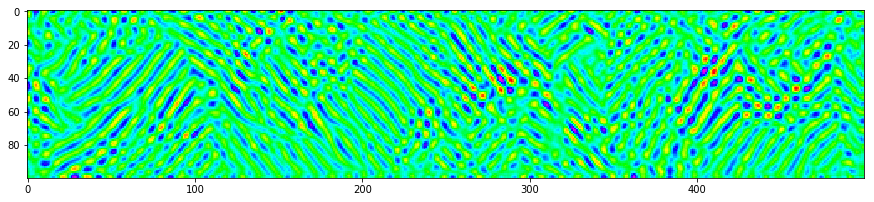

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(f[::-1,:],cmap=cm.gist_rainbow)
plt.show()

In [46]:
!mkdir -p ~/funwave-docker

In [47]:
%cd ~/funwave-docker

/home/sbrandt/funwave-docker


In [123]:
!cp ../input.txt .

In [48]:
%%writefile funwave-tvd.docker
FROM ubuntu

MAINTAINER Steven R. Brandt <sbrandt@cct.lsu.edu>

ENV TEST_USERNAME funw

USER root

RUN apt-get update && \
    apt-get install -y --allow-unauthenticated make g++ gcc findutils python3 python3-pip wget make git patch flex gfortran && \
    apt-get clean 

WORKDIR /home
RUN  wget https://www.open-mpi.org/software/ompi/v2.1/downloads/openmpi-2.1.1.tar.gz && \
    tar xzvf openmpi-2.1.1.tar.gz && \
    cd /home/openmpi-2.1.1 && \
    ./configure &&  \
    make -j 5 install && \
    cd /home && \
    rm -fr openmpi-2.1.1

RUN adduser -q $TEST_USERNAME
USER $TEST_USERNAME

RUN cd /home/$TEST_USERNAME && \
    git clone https://github.com/fengyanshi/FUNWAVE-TVD

ENV LD_LIBRARY_PATH /usr/local/lib

WORKDIR /home/$TEST_USERNAME/FUNWAVE-TVD/src

RUN perl -p -i -e 's/FLAG_8 = -DCOUPLING/#$&/' Makefile
RUN make
RUN chmod 755 /home/$TEST_USERNAME


Writing funwave-tvd.docker


In [49]:
!docker build -f funwave-tvd.docker -t funwave-tvd .

Sending build context to Docker daemon   2.56kB
Step 1/15 : FROM ubuntu
 ---> ccc7a11d65b1
Step 2/15 : MAINTAINER Steven R. Brandt <sbrandt@cct.lsu.edu>
 ---> Running in f8b9dea74119
 ---> 16cea230552d
Removing intermediate container f8b9dea74119
Step 3/15 : ENV TEST_USERNAME funw
 ---> Running in c104d307a2d4
 ---> f9cdb9f80753
Removing intermediate container c104d307a2d4
Step 4/15 : USER root
 ---> Running in e80d0d6f8b92
 ---> e45330b5372f
Removing intermediate container e80d0d6f8b92
Step 5/15 : RUN apt-get update &&     apt-get install -y --allow-unauthenticated make g++ gcc findutils python3 python3-pip wget make git patch flex gfortran &&     apt-get clean
 ---> Running in f1a849d274ff
Get:1 http://security.ubuntu.com/ubuntu xenial-security InRelease [102 kB]
Get:2 http://archive.ubuntu.com/ubuntu xenial InRelease [247 kB]
Get:3 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [102 kB]
Get:4 http://security.ubuntu.com/ubuntu xenial-security/universe Sources [49.7 kB]
Get

Get:12 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libpython3.5-stdlib amd64 3.5.2-2ubuntu0~16.04.3 [2132 kB]
Get:13 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 python3.5 amd64 3.5.2-2ubuntu0~16.04.3 [165 kB]
Get:14 http://archive.ubuntu.com/ubuntu xenial/main amd64 libpython3-stdlib amd64 3.5.1-3 [6818 B]
Get:15 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 dh-python all 2.20151103ubuntu1.1 [74.1 kB]
Get:16 http://archive.ubuntu.com/ubuntu xenial/main amd64 python3 amd64 3.5.1-3 [8710 B]
Get:17 http://archive.ubuntu.com/ubuntu xenial/main amd64 libgdbm3 amd64 1.8.3-13.1 [16.9 kB]
Get:18 http://archive.ubuntu.com/ubuntu xenial/main amd64 libxau6 amd64 1:1.0.8-1 [8376 B]
Get:19 http://archive.ubuntu.com/ubuntu xenial/main amd64 libxdmcp6 amd64 1:1.1.2-1.1 [11.0 kB]
Get:20 http://archive.ubuntu.com/ubuntu xenial/main amd64 libxcb1 amd64 1.11.1-1ubuntu1 [40.0 kB]
Get:21 http://archive.ubuntu.com/ubuntu xenial/main amd64 libx11-data all 2:1.6.3-1u

Get:89 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 cpp-5 amd64 5.4.0-6ubuntu1~16.04.4 [7653 kB]
Get:90 http://archive.ubuntu.com/ubuntu xenial/main amd64 cpp amd64 4:5.3.1-1ubuntu1 [27.7 kB]
Get:91 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libcc1-0 amd64 5.4.0-6ubuntu1~16.04.4 [38.8 kB]
Get:92 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libgomp1 amd64 5.4.0-6ubuntu1~16.04.4 [55.0 kB]
Get:93 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libitm1 amd64 5.4.0-6ubuntu1~16.04.4 [27.4 kB]
Get:94 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libatomic1 amd64 5.4.0-6ubuntu1~16.04.4 [8912 B]
Get:95 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libasan2 amd64 5.4.0-6ubuntu1~16.04.4 [264 kB]
Get:96 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 liblsan0 amd64 5.4.0-6ubuntu1~16.04.4 [105 kB]
Get:97 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 libtsan0 amd64 5.4.0-6ubuntu1~16.04.4 [244 kB]

Processing triggers for libc-bin (2.23-0ubuntu9) ...
Setting up libssl1.0.0:amd64 (1.0.2g-1ubuntu4.8) ...
debconf: unable to initialize frontend: Dialog
debconf: (TERM is not set, so the dialog frontend is not usable.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (Can't locate Term/ReadLine.pm in @INC (you may need to install the Term::ReadLine module) (@INC contains: /etc/perl /usr/local/lib/x86_64-linux-gnu/perl/5.22.1 /usr/local/share/perl/5.22.1 /usr/lib/x86_64-linux-gnu/perl5/5.22 /usr/share/perl5 /usr/lib/x86_64-linux-gnu/perl/5.22 /usr/share/perl/5.22 /usr/local/lib/site_perl /usr/lib/x86_64-linux-gnu/perl-base .) at /usr/share/perl5/Debconf/FrontEnd/Readline.pm line 7.)
debconf: falling back to frontend: Teletype
Setting up libpython3.5-minimal:amd64 (3.5.2-2ubuntu0~16.04.3) ...
Setting up libexpat1:amd64 (2.1.0-7ubuntu0.16.04.3) ...
Setting up python3.5-minimal (3.5.2-2ubuntu0~16.04.3) ...
Setting up python3-minimal (3.5

Selecting previously unselected package libkrb5support0:amd64.
Preparing to unpack .../libkrb5support0_1.13.2+dfsg-5ubuntu2_amd64.deb ...
Unpacking libkrb5support0:amd64 (1.13.2+dfsg-5ubuntu2) ...
Selecting previously unselected package libk5crypto3:amd64.
Preparing to unpack .../libk5crypto3_1.13.2+dfsg-5ubuntu2_amd64.deb ...
Unpacking libk5crypto3:amd64 (1.13.2+dfsg-5ubuntu2) ...
Selecting previously unselected package libkeyutils1:amd64.
Preparing to unpack .../libkeyutils1_1.5.9-8ubuntu1_amd64.deb ...
Unpacking libkeyutils1:amd64 (1.5.9-8ubuntu1) ...
Selecting previously unselected package libkrb5-3:amd64.
Preparing to unpack .../libkrb5-3_1.13.2+dfsg-5ubuntu2_amd64.deb ...
Unpacking libkrb5-3:amd64 (1.13.2+dfsg-5ubuntu2) ...
Selecting previously unselected package libgssapi-krb5-2:amd64.
Preparing to unpack .../libgssapi-krb5-2_1.13.2+dfsg-5ubuntu2_amd64.deb ...
Unpacking libgssapi-krb5-2:amd64 (1.13.2+dfsg-5ubuntu2) ...
Selecting previously unselected package libhcrypto4-heimdal:

Selecting previously unselected package gcc-5.
Preparing to unpack .../gcc-5_5.4.0-6ubuntu1~16.04.4_amd64.deb ...
Unpacking gcc-5 (5.4.0-6ubuntu1~16.04.4) ...
Selecting previously unselected package gcc.
Preparing to unpack .../gcc_4%3a5.3.1-1ubuntu1_amd64.deb ...
Unpacking gcc (4:5.3.1-1ubuntu1) ...
Selecting previously unselected package libstdc++-5-dev:amd64.
Preparing to unpack .../libstdc++-5-dev_5.4.0-6ubuntu1~16.04.4_amd64.deb ...
Unpacking libstdc++-5-dev:amd64 (5.4.0-6ubuntu1~16.04.4) ...
Selecting previously unselected package g++-5.
Preparing to unpack .../g++-5_5.4.0-6ubuntu1~16.04.4_amd64.deb ...
Unpacking g++-5 (5.4.0-6ubuntu1~16.04.4) ...
Selecting previously unselected package g++.
Preparing to unpack .../g++_4%3a5.3.1-1ubuntu1_amd64.deb ...
Unpacking g++ (4:5.3.1-1ubuntu1) ...
Selecting previously unselected package make.
Preparing to unpack .../archives/make_4.1-6_amd64.deb ...
Unpacking make (4.1-6) ...
Selecting previously unselected package libdpkg-perl.
Preparing 

Setting up libxtables11:amd64 (1.6.0-2ubuntu3) ...
Setting up netbase (5.3) ...
Setting up openssl (1.0.2g-1ubuntu4.8) ...
Setting up ca-certificates (20170717~16.04.1) ...
debconf: unable to initialize frontend: Dialog
debconf: (TERM is not set, so the dialog frontend is not usable.)
debconf: falling back to frontend: Readline
Setting up krb5-locales (1.13.2+dfsg-5ubuntu2) ...
Setting up libroken18-heimdal:amd64 (1.7~git20150920+dfsg-4ubuntu1.16.04.1) ...
Setting up libasn1-8-heimdal:amd64 (1.7~git20150920+dfsg-4ubuntu1.16.04.1) ...
Setting up libkrb5support0:amd64 (1.13.2+dfsg-5ubuntu2) ...
Setting up libk5crypto3:amd64 (1.13.2+dfsg-5ubuntu2) ...
Setting up libkeyutils1:amd64 (1.5.9-8ubuntu1) ...
Setting up libkrb5-3:amd64 (1.13.2+dfsg-5ubuntu2) ...
Setting up libgssapi-krb5-2:amd64 (1.13.2+dfsg-5ubuntu2) ...
Setting up libhcrypto4-heimdal:amd64 (1.7~git20150920+dfsg-4ubuntu1.16.04.1) ...
Setting up libheimbase1-heimdal:amd64 (1.7~git20150920+dfsg-4ubuntu1.16.04.1) ...
Setting up lib

   650K .......... .......... .......... .......... ..........  4% 98.3M 5s
   700K .......... .......... .......... .......... ..........  5% 2.61M 5s
   750K .......... .......... .......... .......... ..........  5% 92.3M 4s
   800K .......... .......... .......... .......... ..........  5%  119M 4s
   850K .......... .......... .......... .......... ..........  6% 2.63M 4s
   900K .......... .......... .......... .......... ..........  6%  101M 4s
   950K .......... .......... .......... .......... ..........  7%  109M 4s
  1000K .......... .......... .......... .......... ..........  7% 2.68M 4s
  1050K .......... .......... .......... .......... ..........  7%  105M 3s
  1100K .......... .......... .......... .......... ..........  8% 93.8M 3s
  1150K .......... .......... .......... .......... ..........  8%  107M 3s
  1200K .......... .......... .......... .......... ..........  8% 2.72M 3s
  1250K .......... .......... .......... .......... ..........  9%  111M 3s
  1300K ....

  6650K .......... .......... .......... .......... .......... 47%  123M 1s
  6700K .......... .......... .......... .......... .......... 47% 94.1M 1s
  6750K .......... .......... .......... .......... .......... 47% 4.98M 1s
  6800K .......... .......... .......... .......... .......... 48%  114M 1s
  6850K .......... .......... .......... .......... .......... 48%  105M 1s
  6900K .......... .......... .......... .......... .......... 48%  114M 1s
  6950K .......... .......... .......... .......... .......... 49%  106M 1s
  7000K .......... .......... .......... .......... .......... 49%  115M 1s
  7050K .......... .......... .......... .......... .......... 49%  131M 1s
  7100K .......... .......... .......... .......... .......... 50%  108M 1s
  7150K .......... .......... .......... .......... .......... 50% 87.6M 0s
  7200K .......... .......... .......... .......... .......... 50%  114M 0s
  7250K .......... .......... .......... .......... .......... 51%  113M 0s
  7300K ....

 13850K .......... .......... .......... .......... .......... 97% 8.72M 0s
 13900K .......... .......... .......... .......... .......... 98%  107M 0s
 13950K .......... .......... .......... .......... .......... 98% 90.8M 0s
 14000K .......... .......... .......... .......... .......... 98%  110M 0s
 14050K .......... .......... .......... .......... .......... 99%  110M 0s
 14100K .......... .......... .......... .......... .......... 99%  112M 0s
 14150K .......... .......... .......... .......... .......... 99%  109M 0s
 14200K .......... ..........                                 100%  211M=0.6s

2017-10-03 11:35:49 (23.0 MB/s) - 'openmpi-2.1.1.tar.gz' saved [14561411/14561411]

openmpi-2.1.1/
openmpi-2.1.1/orte/
openmpi-2.1.1/orte/Doxyfile
openmpi-2.1.1/orte/etc/
openmpi-2.1.1/orte/etc/openmpi-default-hostfile
openmpi-2.1.1/orte/etc/Makefile.in
openmpi-2.1.1/orte/etc/Makefile.am
openmpi-2.1.1/orte/include/
openmpi-2.1.1/orte/include/orte/
openmpi-2.1.1/orte/include/orte/framewo

openmpi-2.1.1/orte/mca/ess/alps/Makefile.am
openmpi-2.1.1/orte/mca/ess/hnp/
openmpi-2.1.1/orte/mca/ess/hnp/ess_hnp.h
openmpi-2.1.1/orte/mca/ess/hnp/help-ess-hnp.txt
openmpi-2.1.1/orte/mca/ess/hnp/Makefile.in
openmpi-2.1.1/orte/mca/ess/hnp/Makefile.am
openmpi-2.1.1/orte/mca/ess/hnp/ess_hnp_component.c
openmpi-2.1.1/orte/mca/ess/hnp/ess_hnp_module.c
openmpi-2.1.1/orte/mca/ess/ess.h
openmpi-2.1.1/orte/mca/ess/lsf/
openmpi-2.1.1/orte/mca/ess/lsf/configure.m4
openmpi-2.1.1/orte/mca/ess/lsf/Makefile.in
openmpi-2.1.1/orte/mca/ess/lsf/Makefile.am
openmpi-2.1.1/orte/mca/ess/lsf/ess_lsf_component.c
openmpi-2.1.1/orte/mca/ess/lsf/ess_lsf.h
openmpi-2.1.1/orte/mca/ess/lsf/ess_lsf_module.c
openmpi-2.1.1/orte/mca/ess/pmi/
openmpi-2.1.1/orte/mca/ess/pmi/ess_pmi.h
openmpi-2.1.1/orte/mca/ess/pmi/Makefile.in
openmpi-2.1.1/orte/mca/ess/pmi/Makefile.am
openmpi-2.1.1/orte/mca/ess/pmi/ess_pmi_component.c
openmpi-2.1.1/orte/mca/ess/pmi/ess_pmi_module.c
openmpi-2.1.1/orte/mca/ess/env/
openmpi-2.1.1/orte/mca/es

openmpi-2.1.1/orte/mca/rml/oob/rml_oob_contact.c
openmpi-2.1.1/orte/mca/rml/oob/rml_oob_exception.c
openmpi-2.1.1/orte/mca/rml/oob/Makefile.in
openmpi-2.1.1/orte/mca/rml/oob/Makefile.am
openmpi-2.1.1/orte/mca/rml/oob/rml_oob_send.c
openmpi-2.1.1/orte/mca/rml/oob/rml_oob.h
openmpi-2.1.1/orte/mca/rml/oob/rml_oob_ping.c
openmpi-2.1.1/orte/mca/rml/oob/rml_oob_component.c
openmpi-2.1.1/orte/mca/rml/oob/rml_oob_recv.c
openmpi-2.1.1/orte/mca/rml/ftrm/
openmpi-2.1.1/orte/mca/rml/ftrm/rml_ftrm_module.c
openmpi-2.1.1/orte/mca/rml/ftrm/configure.m4
openmpi-2.1.1/orte/mca/rml/ftrm/rml_ftrm.h
openmpi-2.1.1/orte/mca/rml/ftrm/rml_ftrm_component.c
openmpi-2.1.1/orte/mca/rml/ftrm/Makefile.in
openmpi-2.1.1/orte/mca/rml/ftrm/Makefile.am
openmpi-2.1.1/orte/mca/oob/
openmpi-2.1.1/orte/mca/oob/base/
openmpi-2.1.1/orte/mca/oob/base/base.h
openmpi-2.1.1/orte/mca/oob/base/oob_base_select.c
openmpi-2.1.1/orte/mca/oob/base/oob_base_frame.c
openmpi-2.1.1/orte/mca/oob/base/Makefile.am
openmpi-2.1.1/orte/mca/oob/ba

openmpi-2.1.1/contrib/
openmpi-2.1.1/contrib/dist/
openmpi-2.1.1/contrib/dist/linux/
openmpi-2.1.1/contrib/dist/linux/openmpi.spec
openmpi-2.1.1/contrib/dist/mofed/
openmpi-2.1.1/contrib/dist/mofed/debian/
openmpi-2.1.1/contrib/dist/mofed/debian/rules
openmpi-2.1.1/contrib/dist/mofed/debian/compat
openmpi-2.1.1/contrib/dist/mofed/debian/copyright
openmpi-2.1.1/contrib/dist/mofed/debian/control
openmpi-2.1.1/contrib/dist/mofed/debian/control.in
openmpi-2.1.1/contrib/dist/mofed/debian/changelog.in
openmpi-2.1.1/contrib/dist/mofed/debian/source/
openmpi-2.1.1/contrib/dist/mofed/debian/source/format
openmpi-2.1.1/contrib/dist/mofed/debian/changelog
openmpi-2.1.1/contrib/dist/mofed/debian/rules.in
openmpi-2.1.1/contrib/dist/mofed/compile_debian_mlnx_example.in
openmpi-2.1.1/contrib/dist/make_dist_tarball
openmpi-2.1.1/contrib/dist/macosx-pkg/
openmpi-2.1.1/contrib/dist/macosx-pkg/buildpackage.sh
openmpi-2.1.1/contrib/dist/macosx-pkg/ReadMe.rtf
openmpi-2.1.1/contrib/amca-param-sets/
openmpi-

openmpi-2.1.1/oshmem/mca/spml/Makefile.am
openmpi-2.1.1/oshmem/mca/spml/ucx/
openmpi-2.1.1/oshmem/mca/spml/ucx/spml_ucx.h
openmpi-2.1.1/oshmem/mca/spml/ucx/configure.m4
openmpi-2.1.1/oshmem/mca/spml/ucx/spml_ucx_component.c
openmpi-2.1.1/oshmem/mca/spml/ucx/spml_ucx_component.h
openmpi-2.1.1/oshmem/mca/spml/ucx/spml_ucx.c
openmpi-2.1.1/oshmem/mca/spml/ucx/Makefile.in
openmpi-2.1.1/oshmem/mca/spml/ucx/Makefile.am
openmpi-2.1.1/oshmem/mca/spml/ikrit/
openmpi-2.1.1/oshmem/mca/spml/ikrit/configure.m4
openmpi-2.1.1/oshmem/mca/spml/ikrit/Makefile.in
openmpi-2.1.1/oshmem/mca/spml/ikrit/Makefile.am
openmpi-2.1.1/oshmem/mca/spml/ikrit/spml_ikrit.c
openmpi-2.1.1/oshmem/mca/spml/ikrit/spml_ikrit_component.c
openmpi-2.1.1/oshmem/mca/spml/ikrit/spml_ikrit.h
openmpi-2.1.1/oshmem/mca/spml/ikrit/help-oshmem-spml-ikrit.txt
openmpi-2.1.1/oshmem/mca/spml/ikrit/spml_ikrit_component.h
openmpi-2.1.1/oshmem/mca/Makefile.am
openmpi-2.1.1/oshmem/mca/sshmem/
openmpi-2.1.1/oshmem/mca/sshmem/sshmem.h
openmpi-2.1.

openmpi-2.1.1/config/opal_set_lib_prefix.m4
openmpi-2.1.1/config/ompi_check_mxm.m4
openmpi-2.1.1/config/opal_check_broken_qsort.m4
openmpi-2.1.1/config/ompi_fortran_check_bind_c.m4
openmpi-2.1.1/config/ompi_setup_java.m4
openmpi-2.1.1/config/opal_setup_cc.m4
openmpi-2.1.1/config/ompi_fortran_check_real16_c_equiv.m4
openmpi-2.1.1/config/ompi_fortran_check_storage_size.m4
openmpi-2.1.1/config/config.sub
openmpi-2.1.1/config/opal_check_compiler_works.m4
openmpi-2.1.1/config/opal_check_offsetof.m4
openmpi-2.1.1/config/opal_check_pmi.m4
openmpi-2.1.1/config/ompi_interix.m4
openmpi-2.1.1/config/ompi_setup_mpi_profiling.m4
openmpi-2.1.1/config/ompi_config_threads.m4
openmpi-2.1.1/config/c_get_alignment.m4
openmpi-2.1.1/config/orte_check_slurm.m4
openmpi-2.1.1/config/ompi_fortran_get_alignment.m4
openmpi-2.1.1/config/ompi_fortran_check_iso_fortran_env.m4
openmpi-2.1.1/config/ompi_find_mpi_aint_count_offset.m4
openmpi-2.1.1/config/opal_strip_optflags.m4
openmpi-2.1.1/config/opal_search_libs.m4


openmpi-2.1.1/ompi/mpi/fortran/use-mpi-ignore-tkr/Makefile.am
openmpi-2.1.1/ompi/mpi/fortran/configure-fortran-output-bottom.h
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/add_error_string_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/comm_set_info_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/allreduce_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/comm_compare_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/cart_map_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/ireduce_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/group_translate_ranks_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/put_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/win_flush_local_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/win_attach_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/op_free_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/type_get_envelope_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/errhandler_create_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/ineighbor_alltoallw_f.c
openmpi-2.1.1/ompi/mpi/fortran/mpif-h/errhandler_get_f.c
o

openmpi-2.1.1/ompi/mpi/c/group_excl.c
openmpi-2.1.1/ompi/mpi/c/comm_free.c
openmpi-2.1.1/ompi/mpi/c/query_thread.c
openmpi-2.1.1/ompi/mpi/c/bindings.h
openmpi-2.1.1/ompi/mpi/c/type_indexed.c
openmpi-2.1.1/ompi/mpi/c/win_test.c
openmpi-2.1.1/ompi/mpi/c/add_error_class.c
openmpi-2.1.1/ompi/mpi/c/get_elements_x.c
openmpi-2.1.1/ompi/mpi/c/file_get_position_shared.c
openmpi-2.1.1/ompi/mpi/c/free_mem.c
openmpi-2.1.1/ompi/mpi/c/request_get_status.c
openmpi-2.1.1/ompi/mpi/c/scan.c
openmpi-2.1.1/ompi/mpi/c/lookup_name.c
openmpi-2.1.1/ompi/mpi/c/file_write_at_all.c
openmpi-2.1.1/ompi/mpi/c/file_open.c
openmpi-2.1.1/ompi/mpi/c/type_create_f90_integer.c
openmpi-2.1.1/ompi/mpi/c/gather.c
openmpi-2.1.1/ompi/mpi/c/put.c
openmpi-2.1.1/ompi/mpi/c/iallreduce.c
openmpi-2.1.1/ompi/mpi/c/type_get_attr.c
openmpi-2.1.1/ompi/mpi/c/file_get_atomicity.c
openmpi-2.1.1/ompi/mpi/c/file_set_atomicity.c
openmpi-2.1.1/ompi/mpi/c/bcast.c
openmpi-2.1.1/ompi/mpi/c/ibarrier.c
openmpi-2.1.1/ompi/mpi/c/waitany.c
openmpi-2.

openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/ltoptions.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_cc.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/ltsugar.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/ar-lib
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_fc.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_make.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_runlog.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/ltversion.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/compile
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/lt~obsolete.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/config.guess
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_coverage.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_util.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/config.sub
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/libtool.m4
openmpi-2.1.1/ompi/mca/io/romio314/romio/confdb/aclocal_f77.m4
openmpi-2.1.1/omp

openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_neighbor_alltoallv.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_reduce_scatter.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_allgather.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_module.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_alltoallw.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_scatterv.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_gatherv.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_neighbor_alltoall.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_neighbor_allgather.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_allgatherv.c
openmpi-2.1.1/ompi/mca/coll/basic/coll_basic_exscan.c
openmpi-2.1.1/ompi/mca/coll/portals4/
openmpi-2.1.1/ompi/mca/coll/portals4/coll_portals4_barrier.c
openmpi-2.1.1/ompi/mca/coll/portals4/coll_portals4_bcast.c
openmpi-2.1.1/ompi/mca/coll/portals4/coll_portals4_gather.c
openmpi-2.1.1/ompi/mca/coll/portals4/coll_portals4_request.c
openmpi-2.1.1/ompi/mca/coll/portals4/coll_portals4_reduce.c
openmpi-2.1

openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm.c
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm_types.h
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm_debug.h
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm_probe.c
openmpi-2.1.1/ompi/mca/mtl/mxm/Makefile.in
openmpi-2.1.1/ompi/mca/mtl/mxm/Makefile.am
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm_request.h
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm_component.c
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm.h
openmpi-2.1.1/ompi/mca/mtl/mxm/mtl_mxm_endpoint.c
openmpi-2.1.1/ompi/mca/op/
openmpi-2.1.1/ompi/mca/op/base/
openmpi-2.1.1/ompi/mca/op/base/op_base_frame.c
openmpi-2.1.1/ompi/mca/op/base/functions.h
openmpi-2.1.1/ompi/mca/op/base/op_base_functions.c
openmpi-2.1.1/ompi/mca/op/base/base.h
openmpi-2.1.1/ompi/mca/op/base/op_base_find_available.c
openmpi-2.1.1/ompi/mca/op/base/op_base_op_select.c
openmpi-2.1.1/ompi/mca/op/base/Makefile.include
openmpi-2.1.1/ompi/mca/op/Makefile.in
openmpi-2.1.1/ompi/mca/op/Makefile.am
openmpi-2.1.1/ompi/mca/op/op.h
openmpi-2.1.1/ompi/peruse/
openmpi-2.1.1/

openmpi-2.1.1/opal/mca/btl/ugni/btl_ugni_put.c
openmpi-2.1.1/opal/mca/btl/ugni/btl_ugni_get.c
openmpi-2.1.1/opal/mca/btl/ugni/btl_ugni_atomic.c
openmpi-2.1.1/opal/mca/btl/vader/
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_knem.h
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_component.c
openmpi-2.1.1/opal/mca/btl/vader/configure.m4
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_xpmem.h
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_sendi.c
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_endpoint.h
openmpi-2.1.1/opal/mca/btl/vader/btl_vader.h
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_fbox.h
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_xpmem.c
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_frag.h
openmpi-2.1.1/opal/mca/btl/vader/help-btl-vader.txt
openmpi-2.1.1/opal/mca/btl/vader/Makefile.in
openmpi-2.1.1/opal/mca/btl/vader/Makefile.am
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_frag.c
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_knem.c
openmpi-2.1.1/opal/mca/btl/vader/btl_vader_send.c
openmpi-2.1.1/opal/mca/btl/

openmpi-2.1.1/opal/mca/dl/Makefile.am
openmpi-2.1.1/opal/mca/dl/dl.h
openmpi-2.1.1/opal/mca/dl/dlopen/
openmpi-2.1.1/opal/mca/dl/dlopen/configure.m4
openmpi-2.1.1/opal/mca/dl/dlopen/dl_dlopen_component.c
openmpi-2.1.1/opal/mca/dl/dlopen/dl_dlopen_module.c
openmpi-2.1.1/opal/mca/dl/dlopen/Makefile.in
openmpi-2.1.1/opal/mca/dl/dlopen/Makefile.am
openmpi-2.1.1/opal/mca/dl/dlopen/dl_dlopen.h
openmpi-2.1.1/opal/mca/sec/
openmpi-2.1.1/opal/mca/sec/base/
openmpi-2.1.1/opal/mca/sec/base/base.h
openmpi-2.1.1/opal/mca/sec/base/Makefile.am
openmpi-2.1.1/opal/mca/sec/base/sec_base_frame.c
openmpi-2.1.1/opal/mca/sec/base/sec_base_select.c
openmpi-2.1.1/opal/mca/sec/base/sec_base_stubs.c
openmpi-2.1.1/opal/mca/sec/sec.h
openmpi-2.1.1/opal/mca/sec/basic/
openmpi-2.1.1/opal/mca/sec/basic/sec_basic.h
openmpi-2.1.1/opal/mca/sec/basic/sec_basic.c
openmpi-2.1.1/opal/mca/sec/basic/Makefile.in
openmpi-2.1.1/opal/mca/sec/basic/sec_basic_component.c
openmpi-2.1.1/opal/mca/sec/basic/Makefile.am
openmpi-2.1.1/o

openmpi-2.1.1/opal/datatype/opal_datatype_position.c
openmpi-2.1.1/opal/datatype/opal_datatype_copy.h
openmpi-2.1.1/opal/datatype/opal_datatype_cuda.h
openmpi-2.1.1/opal/datatype/opal_copy_functions_heterogeneous.c
openmpi-2.1.1/opal/datatype/opal_datatype_destroy.c
openmpi-2.1.1/opal/datatype/opal_copy_functions.c
openmpi-2.1.1/opal/datatype/opal_datatype_resize.c
openmpi-2.1.1/opal/datatype/opal_convertor.c
openmpi-2.1.1/opal/datatype/opal_datatype_copy.c
openmpi-2.1.1/opal/datatype/opal_datatype_unpack.c
openmpi-2.1.1/opal/datatype/opal_datatype_cuda.c
openmpi-2.1.1/opal/datatype/opal_datatype_prototypes.h
openmpi-2.1.1/opal/datatype/opal_datatype_create_contiguous.c
openmpi-2.1.1/opal/datatype/Makefile.in
openmpi-2.1.1/opal/datatype/opal_convertor_internal.h
openmpi-2.1.1/opal/datatype/Makefile.am
openmpi-2.1.1/opal/datatype/opal_datatype_get_count.c
openmpi-2.1.1/opal/datatype/opal_datatype_dump.c
openmpi-2.1.1/opal/datatype/opal_convertor_raw.c
openmpi-2.1.1/opal/datatype/opal_co


== Compiler and preprocessor tests

*** C compiler and preprocessor
checking for gcc... (cached) gcc
checking whether we are using the GNU C compiler... (cached) yes
checking whether gcc accepts -g... (cached) yes
checking for gcc option to accept ISO C89... (cached) none needed
checking whether gcc understands -c and -o together... (cached) yes
checking for gcc option to accept ISO C99... none needed
checking for the C compiler vendor... gnu
checking for ANSI C header files... (cached) yes
checking if gcc supports -finline-functions... yes
checking if gcc supports -fno-strict-aliasing... yes
configure: WARNING:  -fno-strict-aliasing has been added to CFLAGS
checking if gcc supports __builtin_expect... yes
checking if gcc supports __builtin_prefetch... yes
checking if gcc supports __builtin_clz... yes
checking for C optimization flags... -O3 -DNDEBUG -finline-functions -fno-strict-aliasing
checking for Interix environment... no
checking for C ident string support... #ident
checking fo

checking  external symbol convention... single underscore
checking if C and Fortran are link compatible... yes
checking to see if Fortran compiler likes the C++ exception flags... skipped (no C++ exceptions flags)
checking to see if mpifort compiler needs additional linker flags... none
checking if Fortran compiler supports CHARACTER... yes
checking size of Fortran CHARACTER... 1
checking for C type corresponding to CHARACTER... char
checking alignment of Fortran CHARACTER... 1
checking for corresponding KIND value of CHARACTER... C_SIGNED_CHAR
checking KIND value of Fortran C_SIGNED_CHAR... 1
checking if Fortran compiler supports LOGICAL... yes
checking size of Fortran LOGICAL... 4
checking for C type corresponding to LOGICAL... int
checking alignment of Fortran LOGICAL... 4
checking for corresponding KIND value of LOGICAL... C_INT
checking KIND value of Fortran C_INT... 4
checking if Fortran compiler supports LOGICAL*1... yes
checking size of Fortran LOGICAL*1... 1
checking for C typ

checking if Fortran compiler supports STORAGE_SIZE for relevant types... yes
checking for Fortran compiler module include flag... -I
checking Fortran compiler ignore TKR syntax... not cached; checking variants
checking for Fortran compiler support of TYPE(*), DIMENSION(*)... no
checking for Fortran compiler support of !GCC$ ATTRIBUTES NO_ARG_CHECK... yes
checking Fortran compiler ignore TKR syntax... 1:type(*), dimension(*):!GCC$ ATTRIBUTES NO_ARG_CHECK ::
checking if Fortran compiler supports ISO_C_BINDING... yes
checking if building Fortran 'use mpi' bindings... yes
checking if Fortran compiler supports SUBROUTINE BIND(C)... yes
checking if Fortran compiler supports TYPE, BIND(C)... yes
checking if Fortran compiler supports TYPE(type), BIND(C, NAME="name")... yes
checking if Fortran compiler supports PROCEDURE... yes
checking if Fortran compiler supports USE...ONLY... yes
checking if Fortran compiler supports optional arguments... yes
checking if Fortran compiler supports C_FUNLOC/TS

checking for socklen_t... yes
checking for struct sockaddr_in... (cached) yes
checking for struct sockaddr_in6... yes
checking for struct sockaddr_storage... yes
checking whether AF_UNSPEC is declared... yes
checking whether PF_UNSPEC is declared... yes
checking whether AF_INET6 is declared... yes
checking whether PF_INET6 is declared... yes
checking if SA_RESTART defined in signal.h... yes
checking for struct sockaddr.sa_len... no
checking for struct dirent.d_type... yes
checking for siginfo_t.si_fd... yes
checking for siginfo_t.si_band... yes
checking for struct statfs.f_type... yes
checking for struct statfs.f_fstypename... no
checking for struct statvfs.f_basetype... no
checking for struct statvfs.f_fstypename... no
checking for pointer diff type... ptrdiff_t (size: 8)
checking for type of MPI_Aint... ptrdiff_t (size: 8)
checking for type of MPI_Count... long long (size: 8)
checking for type of MPI_Offset... long long (size: 8)
checking for an MPI datatype for MPI_Offset... MPI_LON

checking ctype.h usability... yes
checking ctype.h presence... yes
checking for ctype.h... yes
checking for strncasecmp... yes
checking whether function strncasecmp is declared... yes
checking for strftime... yes
checking for setlocale... yes
checking for stdint.h... (cached) yes
checking for sys/mman.h... (cached) yes
checking for KAFFINITY... no
checking for PROCESSOR_CACHE_TYPE... no
checking for CACHE_DESCRIPTOR... no
checking for LOGICAL_PROCESSOR_RELATIONSHIP... no
checking for RelationProcessorPackage... no
checking for SYSTEM_LOGICAL_PROCESSOR_INFORMATION... no
checking for GROUP_AFFINITY... no
checking for PROCESSOR_RELATIONSHIP... no
checking for NUMA_NODE_RELATIONSHIP... no
checking for CACHE_RELATIONSHIP... no
checking for PROCESSOR_GROUP_INFO... no
checking for GROUP_RELATIONSHIP... no
checking for SYSTEM_LOGICAL_PROCESSOR_INFORMATION_EX... no
checking for PSAPI_WORKING_SET_EX_BLOCK... no
checking for PSAPI_WORKING_SET_EX_INFORMATION... no
checking for PROCESSOR_NUMBER... 

checking ucontext.h usability... yes
checking ucontext.h presence... yes
checking for ucontext.h... yes
checking for printstack... no
checking if MCA component backtrace:printstack can compile... no

--- MCA component backtrace:execinfo (m4 configuration macro, priority 30)
checking for MCA component backtrace:execinfo compile mode... static
checking for execinfo.h... (cached) yes
checking for library containing backtrace... none required
checking if MCA component backtrace:execinfo can compile... yes

--- MCA component backtrace:none (m4 configuration macro, priority 0)
checking for MCA component backtrace:none compile mode... static
checking if MCA component backtrace:none can compile... no

+++ Configuring MCA framework btl
checking for no configure components in framework btl... self
checking for m4 configure components in framework btl... smcuda, tcp, portals4, sm, scif, ugni, vader, usnic, openib

--- MCA component btl:self (no configuration)
checking for MCA component btl:self c

checking command to parse /usr/bin/nm -B output from gcc object... ok
checking for sysroot... no
checking for a working dd... /bin/dd
checking how to truncate binary pipes... /bin/dd bs=4096 count=1
checking for mt... no
checking if : is a manifest tool... no
checking for ANSI C header files... yes
checking for sys/types.h... yes
checking for sys/stat.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for memory.h... yes
checking for strings.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for unistd.h... yes
checking for dlfcn.h... yes
checking for objdir... .libs
checking if gcc supports -fno-rtti -fno-exceptions... no
checking for gcc option to produce PIC... -fPIC -DPIC
checking if gcc PIC flag -fPIC -DPIC works... yes
checking if gcc static flag -static works... yes
checking if gcc supports -c -o file.o... yes
checking if gcc supports -c -o file.o... (cached) yes
checking whether the gcc linker (/usr/bin/ld -m elf_x86_64) suppo

config.status: creating Makefile
config.status: creating include/Makefile
config.status: creating config.h
config.status: executing depfiles commands
config.status: executing libtool commands
configure: /bin/bash './configure' succeeded for opal/mca/event/libevent2022/libevent
checking if MCA component event:libevent2022 can compile... yes
 
checking if have working event ops for the event framework... yes
checking for winning event component header file... libevent2022/libevent2022.h

+++ Configuring MCA framework if
checking for no configure components in framework if... 
checking for m4 configure components in framework if... solaris_ipv6, posix_ipv4, bsdx_ipv4, linux_ipv6, bsdx_ipv6

--- MCA component if:solaris_ipv6 (m4 configuration macro)
checking for MCA component if:solaris_ipv6 compile mode... static
checking if MCA component if:solaris_ipv6 can compile... no

--- MCA component if:posix_ipv4 (m4 configuration macro)
checking for MCA component if:posix_ipv4 compile mode... sta

checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking dependency style of gcc... gcc3
checking how to run the C preprocessor... gcc -E
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for ANSI C header files... yes
checking for sys/types.h... yes
checking for sys/stat.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for memory.h... yes
checking for strings.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for unistd.h... yes
checking minix/config.h usability... no
checking minix/config.h 

checking fcntl.h usability... yes
checking fcntl.h presence... yes
checking for fcntl.h... yes
checking for inttypes.h... (cached) yes
checking libgen.h usability... yes
checking libgen.h presence... yes
checking for libgen.h... yes
checking netinet/in.h usability... yes
checking netinet/in.h presence... yes
checking for netinet/in.h... yes
checking for stdint.h... (cached) yes
checking stddef.h usability... yes
checking stddef.h presence... yes
checking for stddef.h... yes
checking for stdlib.h... (cached) yes
checking for string.h... (cached) yes
checking for strings.h... (cached) yes
checking sys/param.h usability... yes
checking sys/param.h presence... yes
checking for sys/param.h... yes
checking sys/select.h usability... yes
checking sys/select.h presence... yes
checking for sys/select.h... yes
checking sys/socket.h usability... yes
checking sys/socket.h presence... yes
checking for sys/socket.h... yes
checking stdarg.h usability... yes
checking stdarg.h presence... yes
checking f

checking if gcc supports __builtin_clz... yes
checking for C optimization flags... -DNDEBUG -O3 -fvisibility=hidden -finline-functions -fno-strict-aliasing
checking for C ident string support... #ident

== Final compiler flags
checking final CPPFLAGS... -I$(PMIX_top_srcdir) -I$(PMIX_top_srcdir)/src -I$(PMIX_top_srcdir)/include -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1/opal/include -I/home/openmpi-2.1.1/opal/include   -I/home/openmpi-2.1.1/opal/mca/hwloc/hwloc1112/hwloc/include -I/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent -I/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent/include  
checking final CFLAGS... -DNDEBUG -O3 -fvisibility=hidden -finline-functions -fno-strict-aliasing

== Configuration complete
checking that generated files are newer than configure... done
configure: creating ./config.status
config.status: creating include/pmix_version.h
config.status: creating Makefile
config.status: creating examples/Makefile
config.status: creat


--- MCA component ess:env (no configuration)
checking for MCA component ess:env compile mode... dso
checking if MCA component ess:env can compile... yes

--- MCA component ess:slurm (m4 configuration macro)
checking for MCA component ess:slurm compile mode... dso
checking for fork... (cached) yes
checking for execve... (cached) yes
checking for setpgid... (cached) yes
checking if MCA component ess:slurm can compile... yes

--- MCA component ess:alps (m4 configuration macro)
checking for MCA component ess:alps compile mode... dso
checking if MCA component ess:alps can compile... no

--- MCA component ess:lsf (m4 configuration macro)
checking for MCA component ess:lsf compile mode... dso
checking --with-lsf value... simple ok (unspecified)
checking --with-lsf-libdir value... simple ok (unspecified)
checking for library containing yp_all... -lnsl
checking lsf/lsf.h usability... no
checking lsf/lsf.h presence... no
checking for lsf/lsf.h... no
checking if MCA component ess:lsf can compile

checking if MCA component rmaps:seq can compile... yes

--- MCA component rmaps:mindist (no configuration)
checking for MCA component rmaps:mindist compile mode... dso
checking if MCA component rmaps:mindist can compile... yes

--- MCA component rmaps:rank_file (no configuration)
checking for MCA component rmaps:rank_file compile mode... dso
checking if MCA component rmaps:rank_file can compile... yes

--- MCA component rmaps:staged (no configuration)
checking for MCA component rmaps:staged compile mode... dso
checking if MCA component rmaps:staged can compile... yes

+++ Configuring MCA framework rml
checking for no configure components in framework rml... oob
checking for m4 configure components in framework rml... ftrm

--- MCA component rml:oob (no configuration)
checking for MCA component rml:oob compile mode... dso
checking if MCA component rml:oob can compile... yes

--- MCA component rml:ftrm (m4 configuration macro)
checking for MCA component rml:ftrm compile mode... dso
check

looking for header without includes
checking pvfs2.h usability... no
checking pvfs2.h presence... no
checking for pvfs2.h... no
checking pvfs2.h usability... no
checking pvfs2.h presence... no
checking for pvfs2.h... no
checking if MCA component fbtl:pvfs2 can compile... no

+++ Configuring MCA framework fcoll
checking for no configure components in framework fcoll... two_phase, dynamic_gen2, dynamic, individual, static
checking for m4 configure components in framework fcoll... 

--- MCA component fcoll:two_phase (no configuration)
checking for MCA component fcoll:two_phase compile mode... dso
checking if MCA component fcoll:two_phase can compile... yes

--- MCA component fcoll:dynamic_gen2 (no configuration)
checking for MCA component fcoll:dynamic_gen2 compile mode... dso
checking if MCA component fcoll:dynamic_gen2 can compile... yes

--- MCA component fcoll:dynamic (no configuration)
checking for MCA component fcoll:dynamic compile mode... dso
checking if MCA component fcoll:dynami

checking for ifort... no
checking for pgf77... no
checking for af77... no
checking for xlf... no
checking for frt... no
checking for cf77... no
checking for fort77... no
checking for fl32... no
checking for fort... no
checking for ifc... no
checking for efc... no
checking for ftn... no
checking for gfortran... gfortran
checking whether we are using the GNU Fortran 77 compiler... yes
checking whether gfortran accepts -g... yes
checking if libtool supports shared libraries... yes
checking whether to build shared libraries... yes
checking whether to build static libraries... no
checking for gfortran option to produce PIC... -fPIC
checking if gfortran PIC flag -fPIC works... yes
checking if gfortran static flag -static works... yes
checking if gfortran supports -c -o file.o... yes
checking if gfortran supports -c -o file.o... (cached) yes
checking whether the gfortran linker (/usr/bin/ld -m elf_x86_64) supports shared libraries... yes
checking dynamic linker characteristics... (cached) GNU

checking mxm/api/mxm_api.h usability... no
checking mxm/api/mxm_api.h presence... no
checking for mxm/api/mxm_api.h... no
checking for MXM version compatibility... no
checking if MCA component mtl:mxm can compile... no

+++ Configuring MCA framework op
checking for no configure components in framework op... 
checking for m4 configure components in framework op... 

+++ Configuring MCA framework osc
checking for no configure components in framework osc... sm
checking for m4 configure components in framework osc... rdma, portals4, pt2pt

--- MCA component osc:sm (no configuration)
checking for MCA component osc:sm compile mode... dso
checking if MCA component osc:sm can compile... yes

--- MCA component osc:rdma (m4 configuration macro)
checking for MCA component osc:rdma compile mode... dso
checking if MCA component osc:rdma can compile... yes
checking for index in endpoint array for tag BML... 0

--- MCA component osc:portals4 (m4 configuration macro)
checking for MCA component osc:por

checking for size of endpoint array... 1

== Extended MPI interfaces setup
checking for available MPI Extensions... cr, affinity, cuda
checking which MPI extension should be enabled... All Available Extensions

--- MPI Extension cr
checking if MPI Extension cr can compile... no

--- MPI Extension affinity
checking if MPI Extension affinity can compile... yes
checking if MPI Extension affinity has C bindings... yes (required)
checking if MPI Extension affinity has mpif.h bindings... no
checking if MPI Extension affinity has "use mpi" bindings... no
checking if MPI Extension affinity has "use mpi_f08" bindings... no

--- MPI Extension cuda
checking if MPI Extension cuda can compile... yes
checking if MPI Extension cuda has C bindings... yes (required)
checking if MPI Extension cuda has mpif.h bindings... no
checking if MPI Extension cuda has "use mpi" bindings... no
checking if MPI Extension cuda has "use mpi_f08" bindings... no

== Contributed software setup

*** Configuring contributed

config.status: creating opal/mca/common/Makefile
config.status: creating opal/mca/common/verbs_usnic/Makefile
config.status: creating opal/mca/common/verbs/Makefile
config.status: creating opal/mca/common/sm/Makefile
config.status: creating opal/mca/common/libfabric/Makefile
config.status: creating opal/mca/common/cuda/Makefile
config.status: creating opal/mca/common/ugni/Makefile
config.status: creating opal/mca/allocator/Makefile
config.status: creating opal/mca/allocator/basic/Makefile
config.status: creating opal/mca/allocator/bucket/Makefile
config.status: creating opal/mca/backtrace/Makefile
config.status: creating opal/mca/backtrace/printstack/Makefile
config.status: creating opal/mca/backtrace/execinfo/Makefile
config.status: creating opal/mca/backtrace/none/Makefile
config.status: creating opal/mca/btl/Makefile
config.status: creating opal/mca/btl/self/Makefile
config.status: creating opal/mca/btl/smcuda/Makefile
config.status: creating opal/mca/btl/tcp/Makefile
config.status:

config.status: creating orte/mca/state/Makefile
config.status: creating orte/mca/state/app/Makefile
config.status: creating orte/mca/state/tool/Makefile
config.status: creating orte/mca/state/dvm/Makefile
config.status: creating orte/mca/state/novm/Makefile
config.status: creating orte/mca/state/hnp/Makefile
config.status: creating orte/mca/state/orted/Makefile
config.status: creating orte/mca/state/staged_orted/Makefile
config.status: creating orte/mca/state/staged_hnp/Makefile
config.status: creating ompi/mca/common/Makefile
config.status: creating ompi/mca/bml/Makefile
config.status: creating ompi/mca/bml/r2/Makefile
config.status: creating ompi/mca/coll/Makefile
config.status: creating ompi/mca/coll/libnbc/Makefile
config.status: creating ompi/mca/coll/inter/Makefile
config.status: creating ompi/mca/coll/sync/Makefile
config.status: creating ompi/mca/coll/basic/Makefile
config.status: creating ompi/mca/coll/sm/Makefile
config.status: creating ompi/mca/coll/self/Makefile
config.stat

config.status: creating ompi/mpi/fortran/use-mpi-f08-desc/Makefile
config.status: creating ompi/mpi/fortran/mpiext/Makefile
config.status: creating ompi/mpi/tool/Makefile
config.status: creating ompi/mpi/tool/profile/Makefile
config.status: creating ompi/tools/ompi_info/Makefile
config.status: creating ompi/tools/wrappers/Makefile
config.status: creating ompi/tools/wrappers/mpicc-wrapper-data.txt
config.status: creating ompi/tools/wrappers/mpic++-wrapper-data.txt
config.status: creating ompi/tools/wrappers/mpifort-wrapper-data.txt
config.status: creating ompi/tools/wrappers/ompi.pc
config.status: creating ompi/tools/wrappers/ompi-c.pc
config.status: creating ompi/tools/wrappers/ompi-cxx.pc
config.status: creating ompi/tools/wrappers/ompi-fort.pc
config.status: creating ompi/tools/wrappers/mpijavac.pl
config.status: creating ompi/tools/mpisync/Makefile
config.status: creating oshmem/Makefile
config.status: creating oshmem/include/Makefile
config.status: creating oshmem/shmem/c/Makefile


  CC       if.lo
  CC       keyval_parse.lo
  CC       malloc.lo
  CC       net.lo
  CC       numtostr.lo
  CC       opal_environ.lo
  CC       opal_getcwd.lo
  CC       opal_pty.lo
  CC       os_dirpath.lo
  CC       os_path.lo
  CC       output.lo
opal_environ.c: In function 'opal_setenv':
opal_environ.c:105:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(&newvalue, "%s=", name);
         ^
opal_environ.c:107:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(&newvalue, "%s=%s", name, value);
         ^
opal_environ.c:165:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&compare, "%s=", name);
     ^
opal_environ.c: In function 'opal_unsetenv':
opal_environ.c:221:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-

  CC       mca_base_parse_paramfile.lo
  CC       mca_base_components_register.lo
  CC       mca_base_framework.lo
mca_base_framework.c: In function 'mca_base_framework_register':
mca_base_framework.c:83:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf (&desc, "Default selection set of components for the %s framework (<none>"
         ^
  CCLD     libmca_base.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/base'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/share/openmpi'
 /usr/bin/install -c -m 644 help-mca-base.txt help-mca-var.txt '/usr/local/share/openmpi'
make[3]: Leaving directory '/home/openmpi-2.1.1/opal/mca/base'
make[2]: Leaving directory '/home/openmpi-2.1.1/opal/mca/base'
Making install in mca/common
make[2]: Entering directory '/home/openmpi-2.1.1/opal/mca/common'
make[3]: Entering directory 

base/installdirs_base_expand.c: In function 'opal_install_dirs_expand_internal':
base/installdirs_base_expand.c:35:13: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
             asprintf(&retval, "%s%s%s", tmp,                            \
             ^
base/installdirs_base_expand.c:27:29: note: in expansion of macro 'EXPAND_STRING2'
 #define EXPAND_STRING(name) EXPAND_STRING2(name, name)
                             ^
base/installdirs_base_expand.c:130:13: note: in expansion of macro 'EXPAND_STRING'
             EXPAND_STRING(prefix);
             ^
base/installdirs_base_expand.c:44:13: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
             asprintf(&retval, "%s%s%s", tmp,                            \
             ^
base/installdirs_base_expand.c:27:29: note: in expansion of macro 'EXPAND_STRING2'
 #define EXPAND_STRING(name) EXPAND_STRING2(name, name)
      

  CCLD     libmca_installdirs.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/installdirs'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Leaving directory '/home/openmpi-2.1.1/opal/mca/installdirs'
make[2]: Leaving directory '/home/openmpi-2.1.1/opal/mca/installdirs'
Making install in mca/memchecker
make[2]: Entering directory '/home/openmpi-2.1.1/opal/mca/memchecker'
  CC       base/memchecker_base_open.lo
  CC       base/memchecker_base_select.lo
  CC       base/memchecker_base_wrappers.lo
  CCLD     libmca_memchecker.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/memchecker'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Leaving directory '/home/openmpi-2.1.1/opal/mca/memchecker'
make[2]: Leaving directory '/home/openmpi-2.1.1/opal/mca/memchecker'
Making install in mca/memcpy
make[2]: Entering directory '/home/o

  CCLD     libmca_backtrace_execinfo.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/backtrace/execinfo'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/home/openmpi-2.1.1/opal/mca/backtrace/execinfo'
make[2]: Leaving directory '/home/openmpi-2.1.1/opal/mca/backtrace/execinfo'
Making install in mca/dl/dlopen
make[2]: Entering directory '/home/openmpi-2.1.1/opal/mca/dl/dlopen'
  CC       dl_dlopen_component.lo
  CC       dl_dlopen_module.lo
dl_dlopen_module.c: In function 'dlopen_foreachfile':
dl_dlopen_module.c:185:13: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
             asprintf(&abs_name, "%s/%s", dirs[i], de->d_name);
             ^
dl_dlopen_module.c: In function 'dlopen_open':
dl_dlopen_module.c:77:13: warning: ignoring return value of 'asprintf', declared with 

libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I./compat -I./include -I./include -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1/opal/include -I/home/openmpi-2.1.1/opal/mca/hwloc/hwloc1112/hwloc/include -Drandom=opal_random -g -O2 -Wall -fno-strict-aliasing -pthread -MT strlcpy.lo -MD -MP -MF .deps/strlcpy.Tpo -c strlcpy.c -o strlcpy.o >/dev/null 2>&1
depbase=`echo select.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -I./compat -I./include -I./include  -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1/opal/include   -I/home/openmpi-2.1.1/opal/mca/hwloc/hwloc1112/hwloc/include -Drandom=opal_random  -g -O2 -Wall -fno-strict-aliasing -pthread -MT select.lo -MD -MP -MF $depbase.Tpo -c -o select.lo select.c &&\
mv -f $depbase.Tpo $depbase.Plo
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I./compat -I./include -I./include -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1 -I/home/openmpi-2.1.1/opal/incl

make[5]: Entering directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent'
make[5]: Nothing to be done for 'install-exec-am'.
make[5]: Nothing to be done for 'install-data-am'.
make[5]: Leaving directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent'
make[4]: Leaving directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent'
Making install in include
make[4]: Entering directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent/include'
make[5]: Entering directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent/include'
make[5]: Nothing to be done for 'install-exec-am'.
make[5]: Nothing to be done for 'install-data-am'.
make[5]: Leaving directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent/include'
make[4]: Leaving directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent/include'
make[3]: Leaving directory '/home/openmpi-2.1.1/opal/mca/event/libevent2022/libevent'
make[3]: Entering directory '/home/openmpi-2.1.

  CC       class/opal_free_list.lo
  CC       class/opal_bitmap.lo
  CC       class/opal_hash_table.lo
  CC       class/opal_tree.lo
  CC       class/opal_hotel.lo
  CC       class/opal_list.lo
  CC       class/opal_object.lo
  CC       class/opal_graph.lo
  CC       class/opal_lifo.lo
  CC       class/opal_fifo.lo
  CC       class/opal_pointer_array.lo
  CC       class/opal_value_array.lo
  CC       class/opal_ring_buffer.lo
  CC       class/opal_rb_tree.lo
  CC       errhandler/opal_errhandler.lo
  CC       memoryhooks/memory.lo
  CC       runtime/opal_progress.lo
  CC       runtime/opal_finalize.lo
  CC       runtime/opal_init.lo
  CC       runtime/opal_params.lo
  CC       runtime/opal_info_support.lo
  CC       runtime/opal_progress_threads.lo
  CC       threads/condition.lo
runtime/opal_params.c: In function 'opal_register_params':
runtime/opal_params.c:109:17: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
             

  CC       threads/wait_sync.lo
  CC       dss/dss_internal_functions.lo
  CC       dss/dss_compare.lo
  CC       dss/dss_copy.lo
  CC       dss/dss_dump.lo
  CC       dss/dss_load_unload.lo
  CC       dss/dss_lookup.lo
  CC       dss/dss_pack.lo
  CC       dss/dss_peek.lo
  CC       dss/dss_print.lo
  CC       dss/dss_register.lo
  CC       dss/dss_unpack.lo
dss/dss_pack.c: In function 'opal_dss_pack_float':
dss/dss_pack.c:342:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(&convert, "%f", ssrc[i]);
         ^
dss/dss_pack.c: In function 'opal_dss_pack_double':
dss/dss_pack.c:363:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(&convert, "%f", ssrc[i]);
         ^
dss/dss_print.c: In function 'opal_dss_print_byte':
dss/dss_print.c:56:25: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-W

  CCLD     libopen-pal.la
make[3]: Entering directory '/home/openmpi-2.1.1/opal'
 /bin/mkdir -p '/usr/local/share/openmpi'
 /bin/mkdir -p '/usr/local/lib'
 /bin/bash ../libtool   --mode=install /usr/bin/install -c   libopen-pal.la '/usr/local/lib'
 /usr/bin/install -c -m 644 runtime/help-opal-runtime.txt runtime/help-opal_info.txt '/usr/local/share/openmpi'
libtool: install: /usr/bin/install -c .libs/libopen-pal.so.20.10.1 /usr/local/lib/libopen-pal.so.20.10.1
libtool: install: (cd /usr/local/lib && { ln -s -f libopen-pal.so.20.10.1 libopen-pal.so.20 || { rm -f libopen-pal.so.20 && ln -s libopen-pal.so.20.10.1 libopen-pal.so.20; }; })
libtool: install: (cd /usr/local/lib && { ln -s -f libopen-pal.so.20.10.1 libopen-pal.so || { rm -f libopen-pal.so && ln -s libopen-pal.so.20.10.1 libopen-pal.so; }; })
libtool: install: /usr/bin/install -c .libs/libopen-pal.lai /usr/local/lib/libopen-pal.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfi

 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_btl_self.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_btl_self.so /usr/local/lib/openmpi/mca_btl_self.so
libtool: install: /usr/bin/install -c .libs/mca_btl_self.lai /usr/local/lib/openmpi/mca_btl_self.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
  

make[2]: Entering directory '/home/openmpi-2.1.1/opal/mca/mpool/hugepage'
  CC       mpool_hugepage_module.lo
  CC       mpool_hugepage_component.lo
  CCLD     mca_mpool_hugepage.la
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/mpool/hugepage'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_mpool_hugepage.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_mpool_hugepage.so /usr/local/lib/openmpi/mca_mpool_hugepage.so
libtool: install: /usr/bin/install -c .libs/mca_mpool_hugepage.lai /usr/local/lib/openmpi/mca_mpool_hugepage.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed li

  CCLD     mca_pstat_linux.la
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/pstat/linux'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_pstat_linux.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_pstat_linux.so /usr/local/lib/openmpi/mca_pstat_linux.so
libtool: install: /usr/bin/install -c .libs/mca_pstat_linux.lai /usr/local/lib/openmpi/mca_pstat_linux.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least

make[2]: Entering directory '/home/openmpi-2.1.1/opal/mca/shmem/mmap'
  CC       shmem_mmap_component.lo
  CC       shmem_mmap_module.lo
  CCLD     mca_shmem_mmap.la
make[3]: Entering directory '/home/openmpi-2.1.1/opal/mca/shmem/mmap'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/share/openmpi'
 /usr/bin/install -c -m 644 help-opal-shmem-mmap.txt '/usr/local/share/openmpi'
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_shmem_mmap.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_shmem_mmap.so /usr/local/lib/openmpi/mca_shmem_mmap.so
libtool: install: /usr/bin/install -c .libs/mca_shmem_mmap.lai /usr/local/lib/openmpi/mca_shmem_mmap.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:


base/filem_base_receive.c: In function 'filem_base_process_get_remote_path_cmd':
base/filem_base_receive.c:248:9: warning: ignoring return value of 'getcwd', declared with attribute warn_unused_result [-Wunused-result]
         getcwd(cwd, sizeof(cwd));
         ^
base/filem_base_receive.c:249:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(&tmp_name, "%s/%s", cwd, filename);
         ^
  CCLD     libmca_filem.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/filem'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/share/man/man7'
 /usr/bin/install -c -m 644 orte_filem.7 '/usr/local/share/man/man7'
make[3]: Leaving directory '/home/openmpi-2.1.1/orte/mca/filem'
make[2]: Leaving directory '/home/openmpi-2.1.1/orte/mca/filem'
Making install in mca/grpcomm
make[2]: Entering directory '/home/openmpi-2.1.1/orte/mca

  CCLD     libmca_ras.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/ras'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/share/openmpi'
 /usr/bin/install -c -m 644 base/help-ras-base.txt '/usr/local/share/openmpi'
make[3]: Leaving directory '/home/openmpi-2.1.1/orte/mca/ras'
make[2]: Leaving directory '/home/openmpi-2.1.1/orte/mca/ras'
Making install in mca/rmaps
make[2]: Entering directory '/home/openmpi-2.1.1/orte/mca/rmaps'
  CC       base/rmaps_base_frame.lo
  CC       base/rmaps_base_ranking.lo
  CC       base/rmaps_base_map_job.lo
  CC       base/rmaps_base_select.lo
  CC       base/rmaps_base_support_fns.lo
base/rmaps_base_frame.c: In function 'orte_rmaps_base_open':
base/rmaps_base_frame.c:277:13: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
             asprintf(&rmaps_base_mapping_policy, "ppr:%s", orte_rmaps_ba

  CC       runtime/orte_globals.lo
  CC       runtime/orte_quit.lo
  CC       runtime/data_type_support/orte_dt_compare_fns.lo
  CC       runtime/data_type_support/orte_dt_copy_fns.lo
  CC       runtime/data_type_support/orte_dt_print_fns.lo
  CC       runtime/data_type_support/orte_dt_packing_fns.lo
  CC       runtime/data_type_support/orte_dt_unpacking_fns.lo
  CC       runtime/orte_mca_params.lo
runtime/data_type_support/orte_dt_print_fns.c: In function 'orte_dt_quick_print':
runtime/data_type_support/orte_dt_print_fns.c:58:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(output, "%sData type: %s\tData size: 8-bit\tValue: NULL pointer",
         ^
runtime/data_type_support/orte_dt_print_fns.c:66:13: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
             asprintf(output, "%sData type: %s\tData size: 8-bit\tValue: %d",
             ^
runtime/d

  CC       runtime/orte_wait.lo
runtime/orte_mca_params.c: In function 'orte_register_params':
runtime/orte_mca_params.c:353:9: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
         asprintf(&orte_default_hostfile, "%s/openmpi-default-hostfile", opal_install_dirs.sysconfdir);
         ^
  CC       runtime/orte_data_server.lo
  CC       runtime/orte_info_support.lo
  CC       util/error_strings.lo
  CC       util/name_fns.lo
  CC       util/proc_info.lo
runtime/orte_info_support.c: In function 'orte_info_show_orte_version':
runtime/orte_info_support.c:100:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&tmp, "%s:version:full", orte_info_type_orte);
     ^
runtime/orte_info_support.c:109:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&tmp, "%s:version:repo", orte_info_type_ort

libtool: install: /usr/bin/install -c .libs/libopen-rte.so.20.10.1T /usr/local/lib/libopen-rte.so.20.10.1
libtool: install: (cd /usr/local/lib && { ln -s -f libopen-rte.so.20.10.1 libopen-rte.so.20 || { rm -f libopen-rte.so.20 && ln -s libopen-rte.so.20.10.1 libopen-rte.so.20; }; })
libtool: install: (cd /usr/local/lib && { ln -s -f libopen-rte.so.20.10.1 libopen-rte.so || { rm -f libopen-rte.so && ln -s libopen-rte.so.20.10.1 libopen-rte.so; }; })
libtool: install: /usr/bin/install -c .libs/libopen-rte.lai /usr/local/lib/libopen-rte.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and d

  CCLD     mca_errmgr_default_app.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/errmgr/default_app'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_errmgr_default_app.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_errmgr_default_app.so /usr/local/lib/openmpi/mca_errmgr_default_app.so
libtool: install: /usr/bin/install -c .libs/mca_errmgr_default_app.lai /usr/local/lib/openmpi/mca_errmgr_default_app.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use t

make[2]: Entering directory '/home/openmpi-2.1.1/orte/mca/ess/tool'
  CC       ess_tool_component.lo
  CC       ess_tool_module.lo
  CCLD     mca_ess_tool.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/ess/tool'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_ess_tool.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_ess_tool.so /usr/local/lib/openmpi/mca_ess_tool.so
libtool: install: /usr/bin/install -c .libs/mca_ess_tool.lai /usr/local/lib/openmpi/mca_ess_tool.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use li

make[2]: Entering directory '/home/openmpi-2.1.1/orte/mca/ess/slurm'
  CC       ess_slurm_component.lo
  CC       ess_slurm_module.lo
  CCLD     mca_ess_slurm.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/ess/slurm'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_ess_slurm.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_ess_slurm.so /usr/local/lib/openmpi/mca_ess_slurm.so
libtool: install: /usr/bin/install -c .libs/mca_ess_slurm.lai /usr/local/lib/openmpi/mca_ess_slurm.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must eit

libtool: install: /usr/bin/install -c .libs/mca_iof_mr_orted.so /usr/local/lib/openmpi/mca_iof_mr_orted.so
libtool: install: /usr/bin/install -c .libs/mca_iof_mr_orted.lai /usr/local/lib/openmpi/mca_iof_mr_orted.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
     during linking
   - use the '-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to '/etc/ld.so.conf'


libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
     during linking
   - use the '-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to '/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
make[3]: Leavi

 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_oob_tcp.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_oob_tcp.so /usr/local/lib/openmpi/mca_oob_tcp.so
libtool: install: /usr/bin/install -c .libs/mca_oob_tcp.lai /usr/local/lib/openmpi/mca_oob_tcp.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
     du

make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/plm/rsh'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/share/openmpi'
 /usr/bin/install -c -m 644 help-plm-rsh.txt '/usr/local/share/openmpi'
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_plm_rsh.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_plm_rsh.so /usr/local/lib/openmpi/mca_plm_rsh.so
libtool: install: /usr/bin/install -c .libs/mca_plm_rsh.lai /usr/local/lib/openmpi/mca_plm_rsh.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the librar

  CCLD     mca_ras_loadleveler.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/ras/loadleveler'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_ras_loadleveler.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_ras_loadleveler.so /usr/local/lib/openmpi/mca_ras_loadleveler.so
libtool: install: /usr/bin/install -c .libs/mca_ras_loadleveler.lai /usr/local/lib/openmpi/mca_ras_loadleveler.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag du

libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
     during linking
   - use the '-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to '/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
make[3]: Leavi

make[2]: Entering directory '/home/openmpi-2.1.1/orte/mca/routed/binomial'
  CC       routed_binomial.lo
  CC       routed_binomial_component.lo
  CCLD     mca_routed_binomial.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/routed/binomial'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_routed_binomial.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_routed_binomial.so /usr/local/lib/openmpi/mca_routed_binomial.so
libtool: install: /usr/bin/install -c .libs/mca_routed_binomial.lai /usr/local/lib/openmpi/mca_routed_binomial.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed

  CCLD     mca_rtc_hwloc.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/rtc/hwloc'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_rtc_hwloc.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_rtc_hwloc.so /usr/local/lib/openmpi/mca_rtc_hwloc.so
libtool: install: /usr/bin/install -c .libs/mca_rtc_hwloc.lai /usr/local/lib/openmpi/mca_rtc_hwloc.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the fo

  CCLD     mca_state_app.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/state/app'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_state_app.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_state_app.so /usr/local/lib/openmpi/mca_state_app.so
libtool: install: /usr/bin/install -c .libs/mca_state_app.lai /usr/local/lib/openmpi/mca_state_app.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the fo

  CC       state_orted_component.lo
  CC       state_orted.lo
  CCLD     mca_state_orted.la
make[3]: Entering directory '/home/openmpi-2.1.1/orte/mca/state/orted'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_state_orted.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_state_orted.so /usr/local/lib/openmpi/mca_state_orted.so
libtool: install: /usr/bin/install -c .libs/mca_state_orted.lai /usr/local/lib/openmpi/mca_state_orted.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the libr

make[2]: Entering directory '/home/openmpi-2.1.1/orte/tools/orterun'
  CC       orterun.o
  CC       main.o
  SED      orterun.1
  CCLD     orterun
make[3]: Entering directory '/home/openmpi-2.1.1/orte/tools/orterun'
 /bin/mkdir -p '/usr/local/bin'
 /bin/mkdir -p '/usr/local/share/openmpi'
 /bin/mkdir -p '/usr/local/share/man/man1'
 /usr/bin/install -c -m 644 help-orterun.txt '/usr/local/share/openmpi'
  /bin/bash ../../../libtool   --mode=install /usr/bin/install -c orterun '/usr/local/bin'
 /usr/bin/install -c -m 644 orterun.1 '/usr/local/share/man/man1'
libtool: install: /usr/bin/install -c .libs/orterun /usr/local/bin/orterun
make[3]: Leaving directory '/home/openmpi-2.1.1/orte/tools/orterun'
make[2]: Leaving directory '/home/openmpi-2.1.1/orte/tools/orterun'
Making install in tools/wrappers
make[2]: Entering directory '/home/openmpi-2.1.1/orte/tools/wrappers'
make[3]: Entering directory '/home/openmpi-2.1.1/orte/tools/wrappers'
make  install-exec-hook
 /bin/mkdir -p '/usr/local/sh

param.c: In function 'orte_info_show_mca_group_params':
param.c:166:17: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
                 asprintf (&message, "MCA %s", group->group_framework);
                 ^
param.c: In function 'orte_info_show_path':
param.c:306:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&path, "path:%s", type);
     ^
param.c: In function 'orte_info_do_config':
param.c:360:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&threads, "%s (OPAL: %s, ORTE progress: yes, Event lib: yes)",
     ^
  SED      orte-info.1
  CCLD     orte-info
make[3]: Entering directory '/home/openmpi-2.1.1/orte/tools/orte-info'
 /bin/mkdir -p '/usr/local/bin'
 /bin/mkdir -p '/usr/local/share/openmpi'
 /bin/mkdir -p '/usr/local/share/man/man1'
  /bin/bash ../../../libtool   --mod

Making install in profile
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mpi/c/profile'
  LN_S     pabort.c
  LN_S     padd_error_class.c
  LN_S     paddress.c
  LN_S     padd_error_code.c
  LN_S     padd_error_string.c
  LN_S     pallgatherv.c
  LN_S     pallgather.c
  LN_S     piallgather.c
  LN_S     palloc_mem.c
  LN_S     piallgatherv.c
  LN_S     piallreduce.c
  LN_S     pallreduce.c
  LN_S     palltoall.c
  LN_S     pialltoall.c
  LN_S     palltoallv.c
  LN_S     pialltoallv.c
  LN_S     palltoallw.c
  LN_S     pialltoallw.c
  LN_S     pattr_delete.c
  LN_S     pattr_get.c
  LN_S     pbarrier.c
  LN_S     pattr_put.c
  LN_S     pibarrier.c
  LN_S     pbcast.c
  LN_S     pibcast.c
  LN_S     pbsend.c
  LN_S     pbsend_init.c
  LN_S     pbuffer_detach.c
  LN_S     pbuffer_attach.c
  LN_S     pcancel.c
  LN_S     pcart_coords.c
  LN_S     pcart_create.c
  LN_S     pcart_get.c
  LN_S     pcart_map.c
  LN_S     pcartdim_get.c
  LN_S     pcart_rank.c
  LN_S     pcart_shift.c
  

  LN_S     pfile_iread_all.c
  LN_S     pfile_iread_shared.c
  LN_S     pfile_iwrite_at.c
  LN_S     pfile_iwrite.c
  LN_S     pfile_iwrite_at_all.c
  LN_S     pfile_iwrite_all.c
  LN_S     pfile_iwrite_shared.c
  LN_S     pfile_open.c
  LN_S     pfile_preallocate.c
  LN_S     pfile_read_all_begin.c
  LN_S     pfile_read_all.c
  LN_S     pfile_read_all_end.c
  LN_S     pfile_read_at_all_begin.c
  LN_S     pfile_read_at_all.c
  LN_S     pfile_read_at_all_end.c
  LN_S     pfile_read_at.c
  LN_S     pfile_read.c
  LN_S     pfile_read_ordered_begin.c
  LN_S     pfile_read_ordered.c
  LN_S     pfile_read_ordered_end.c
  LN_S     pfile_read_shared.c
  LN_S     pfile_seek.c
  LN_S     pfile_seek_shared.c
  LN_S     pfile_set_atomicity.c
  LN_S     pfile_set_errhandler.c
  LN_S     pfile_set_info.c
  LN_S     pfile_set_size.c
  LN_S     pfile_set_view.c
  LN_S     pfile_sync.c
  LN_S     pfile_write_all_begin.c
  LN_S     pfile_write_all.c
  LN_S     pfile_write_all_end.c
  LN_S     pfile_writ

  CC       pgrequest_complete.lo
  CC       pgrequest_start.lo
  CC       pgroup_c2f.lo
  CC       pgroup_compare.lo
  CC       pgroup_difference.lo
  CC       pgroup_excl.lo
  CC       pgroup_f2c.lo
  CC       pgroup_free.lo
  CC       pgroup_incl.lo
  CC       pgroup_intersection.lo
  CC       pgroup_range_excl.lo
  CC       pgroup_range_incl.lo
  CC       pgroup_rank.lo
  CC       pgroup_size.lo
  CC       pgroup_translate_ranks.lo
  CC       pgroup_union.lo
  CC       pibsend.lo
  CC       pimprobe.lo
  CC       pimrecv.lo
  CC       pinfo_c2f.lo
  CC       pinfo_create.lo
  CC       pinfo_delete.lo
  CC       pinfo_dup.lo
  CC       pinfo_f2c.lo
  CC       pinfo_free.lo
  CC       pinfo_get.lo
  CC       pinfo_get_nkeys.lo
  CC       pinfo_get_nthkey.lo
  CC       pinfo_get_valuelen.lo
  CC       pinfo_set.lo
  CC       pinit.lo
  CC       pinit_thread.lo
  CC       pinitialized.lo
  CC       pintercomm_create.lo
  CC       pintercomm_merge.lo
  CC       piprobe.lo
  CC       pire

  CC       prget.lo
  CC       prput.lo
  CC       prget_accumulate.lo
  CC       prsend_init.lo
  CC       prsend.lo
  CC       pscan.lo
In file included from prget_accumulate.c:34:0:
../../../../ompi/op/op.h: In function 'ompi_op_is_valid':
../../../../ompi/op/op.h:486:17: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
                 (void) asprintf(msg,
                 ^
../../../../ompi/op/op.h:494:17: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
                 (void) asprintf(msg,
                 ^
In file included from prget_accumulate.c:34:0:
../../../../ompi/op/op.h:498:17: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
                 (void) asprintf(msg,
                 ^
  CC       piscan.lo
  CC       pscatter.lo
  CC       piscatter.lo
  CC       pscatterv.lo
In file included from pisca

  CC       pfile_write_shared.lo
  CC       pregister_datarep.lo
  CCLD     libmpi_c_pmpi.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/home/openmpi-2.1.1/ompi/mpi/c/profile'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/home/openmpi-2.1.1/ompi/mpi/c/profile'
make[3]: Leaving directory '/home/openmpi-2.1.1/ompi/mpi/c/profile'
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mpi/c'
  CC       attr_fn.lo
  CCLD     libmpi_c.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/home/openmpi-2.1.1/ompi/mpi/c'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Leaving directory '/home/openmpi-2.1.1/ompi/mpi/c'
make[3]: Leaving directory '/home/openmpi-2.1.1/ompi/mpi/c'
make[2]: Leaving directory '/home/openmpi-2.1.1/ompi/mpi/c'
Making install in mpi/tool
make[2]: Entering directory '/home/openmpi-2.1.1/ompi/m

make[2]: Entering directory '/home/openmpi-2.1.1/ompi/mca/fbtl'
  CC       base/fbtl_base_file_unselect.lo
  CC       base/fbtl_base_frame.lo
  CC       base/fbtl_base_file_select.lo
  CC       base/fbtl_base_find_available.lo
  CCLD     libmca_fbtl.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mca/fbtl'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Leaving directory '/home/openmpi-2.1.1/ompi/mca/fbtl'
make[2]: Leaving directory '/home/openmpi-2.1.1/ompi/mca/fbtl'
Making install in mca/fcoll
make[2]: Entering directory '/home/openmpi-2.1.1/ompi/mca/fcoll'
  CC       base/fcoll_base_frame.lo
  CC       base/fcoll_base_find_available.lo
  CC       base/fcoll_base_file_select.lo
  CC       base/fcoll_base_file_unselect.lo
  CCLD     libmca_fcoll.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mca/fcoll'
make[3]: Nothing to be done for 'i

ar: `u' modifier ignored since `D' is the default (see `U')
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mca/pml/v'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Leaving directory '/home/openmpi-2.1.1/ompi/mca/pml/v'
make[2]: Leaving directory '/home/openmpi-2.1.1/ompi/mca/pml/v'
Making install in mca/rte/orte
make[2]: Entering directory '/home/openmpi-2.1.1/ompi/mca/rte/orte'
cp -f ../../../../orte/tools/orterun/orterun.1 mpirun.1
cp -f ../../../../orte/tools/orterun/orterun.1 mpiexec.1
cp -f ../../../../orte/tools/orte-ps/orte-ps.1 ompi-ps.1
  CC       rte_orte_component.lo
  CC       rte_orte_module.lo
cp -f ../../../../orte/tools/orte-clean/orte-clean.1 ompi-clean.1
cp -f ../../../../orte/tools/orte-top/orte-top.1 ompi-top.1
cp -f ../../../../orte/tools/orte-server/orte-server.1 ompi-server.1
cp -f ../../../../orte/tools/orte-dvm/orte-dvm.1 ompi-dvm.1
cp -f ../../../../orte/tools/orte-submit/orte-submit.1 ompi-submit.1
rte_orte_module.c: In function 'ompi_rte

  SED      mpi/man/man3/MPI_Comm_c2f.3
  SED      mpi/man/man3/MPI_Comm_call_errhandler.3
  SED      mpi/man/man3/MPI_Comm_connect.3
  SED      mpi/man/man3/MPI_Comm_compare.3
  SED      mpi/man/man3/MPI_Comm_create.3
  SED      mpi/man/man3/MPI_Comm_create_group.3
  SED      mpi/man/man3/MPI_Comm_create_errhandler.3
  SED      mpi/man/man3/MPI_Comm_create_keyval.3
  SED      mpi/man/man3/MPI_Comm_delete_attr.3
  SED      mpi/man/man3/MPI_Comm_disconnect.3
  SED      mpi/man/man3/MPI_Comm_dup.3
  SED      mpi/man/man3/MPI_Comm_dup_with_info.3
  SED      mpi/man/man3/MPI_Comm_idup.3
  SED      mpi/man/man3/MPI_Comm_f2c.3
  SED      mpi/man/man3/MPI_Comm_free.3
  SED      mpi/man/man3/MPI_Comm_free_keyval.3
  SED      mpi/man/man3/MPI_Comm_get_attr.3
  SED      mpi/man/man3/MPI_Comm_get_errhandler.3
  SED      mpi/man/man3/MPI_Comm_get_info.3
  SED      mpi/man/man3/MPI_Comm_get_name.3
  SED      mpi/man/man3/MPI_Comm_get_parent.3
  SED      mpi/man/man3/MPI_Comm_group.3
  SED      mpi/m

  SED      mpi/man/man3/MPI_Recv_init.3
  SED      mpi/man/man3/MPI_Reduce.3
  SED      mpi/man/man3/MPI_Ireduce.3
  SED      mpi/man/man3/MPI_Reduce_local.3
  SED      mpi/man/man3/MPI_Reduce_scatter.3
  SED      mpi/man/man3/MPI_Ireduce_scatter.3
  SED      mpi/man/man3/MPI_Reduce_scatter_block.3
  SED      mpi/man/man3/MPI_Ireduce_scatter_block.3
  SED      mpi/man/man3/MPI_Register_datarep.3
  SED      mpi/man/man3/MPI_Request_c2f.3
  SED      mpi/man/man3/MPI_Request_f2c.3
  SED      mpi/man/man3/MPI_Request_free.3
  SED      mpi/man/man3/MPI_Request_get_status.3
  SED      mpi/man/man3/MPI_Rget.3
  SED      mpi/man/man3/MPI_Rget_accumulate.3
  SED      mpi/man/man3/MPI_Rput.3
  SED      mpi/man/man3/MPI_Rsend.3
  SED      mpi/man/man3/MPI_Rsend_init.3
  SED      mpi/man/man3/MPI_Scan.3
  SED      mpi/man/man3/MPI_Iscan.3
  SED      mpi/man/man3/MPI_Scatter.3
  SED      mpi/man/man3/MPI_Iscatter.3
  SED      mpi/man/man3/MPI_Scatterv.3
  SED      mpi/man/man3/MPI_Iscatterv.3
  SED

 /usr/bin/install -c -m 644 mpi/man/man3/MPI_Compare_and_swap.3 mpi/man/man3/MPI_Dims_create.3 mpi/man/man3/MPI_Dist_graph_create.3 mpi/man/man3/MPI_Dist_graph_create_adjacent.3 mpi/man/man3/MPI_Dist_graph_neighbors.3 mpi/man/man3/MPI_Dist_graph_neighbors_count.3 mpi/man/man3/MPI_Errhandler_create.3 mpi/man/man3/MPI_Errhandler_free.3 mpi/man/man3/MPI_Errhandler_get.3 mpi/man/man3/MPI_Errhandler_set.3 mpi/man/man3/MPI_Error_class.3 mpi/man/man3/MPI_Error_string.3 mpi/man/man3/MPI_Exscan.3 mpi/man/man3/MPI_Iexscan.3 mpi/man/man3/MPI_Fetch_and_op.3 mpi/man/man3/MPI_File_c2f.3 mpi/man/man3/MPI_File_call_errhandler.3 mpi/man/man3/MPI_File_close.3 mpi/man/man3/MPI_File_create_errhandler.3 mpi/man/man3/MPI_File_delete.3 mpi/man/man3/MPI_File_f2c.3 mpi/man/man3/MPI_File_get_amode.3 mpi/man/man3/MPI_File_get_atomicity.3 mpi/man/man3/MPI_File_get_byte_offset.3 mpi/man/man3/MPI_File_get_errhandler.3 mpi/man/man3/MPI_File_get_group.3 mpi/man/man3/MPI_File_get_info.3 mpi/man/man3/MPI_File_get_posit

libtool: install: /usr/bin/install -c .libs/libmpi.so.20.10.1T /usr/local/lib/libmpi.so.20.10.1
libtool: install: (cd /usr/local/lib && { ln -s -f libmpi.so.20.10.1 libmpi.so.20 || { rm -f libmpi.so.20 && ln -s libmpi.so.20.10.1 libmpi.so.20; }; })
libtool: install: (cd /usr/local/lib && { ln -s -f libmpi.so.20.10.1 libmpi.so || { rm -f libmpi.so && ln -s libmpi.so.20.10.1 libmpi.so; }; })
libtool: install: /usr/bin/install -c .libs/libmpi.lai /usr/local/lib/libmpi.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PA

  LN_S     ptype_free_f.c
  LN_S     ptype_free_keyval_f.c
  LN_S     ptype_get_attr_f.c
  LN_S     ptype_get_contents_f.c
  LN_S     ptype_get_envelope_f.c
  LN_S     ptype_get_extent_f.c
  LN_S     ptype_get_extent_x_f.c
  LN_S     ptype_get_name_f.c
  LN_S     ptype_get_true_extent_f.c
  LN_S     ptype_get_true_extent_x_f.c
  LN_S     ptype_hindexed_f.c
  LN_S     ptype_hvector_f.c
  LN_S     ptype_indexed_f.c
  LN_S     ptype_lb_f.c
  LN_S     ptype_match_size_f.c
  LN_S     ptype_set_attr_f.c
  LN_S     ptype_set_name_f.c
  LN_S     ptype_size_f.c
  LN_S     ptype_size_x_f.c
  LN_S     ptype_struct_f.c
  LN_S     ptype_ub_f.c
  LN_S     ptype_vector_f.c
  LN_S     punpack_external_f.c
  LN_S     punpack_f.c
  LN_S     punpublish_name_f.c
  LN_S     pwaitany_f.c
  LN_S     pwaitall_f.c
  LN_S     pwait_f.c
  LN_S     pwaitsome_f.c
  LN_S     pwtick_f.c
  LN_S     pwtime_f.c
  LN_S     paccumulate_f.c
  LN_S     praccumulate_f.c
  LN_S     pget_f.c
  LN_S     prget_f.c
  LN_S     pg

  CC       pinfo_create_f.lo
  CC       pinfo_delete_f.lo
  CC       pinfo_dup_f.lo
  CC       pinfo_free_f.lo
  CC       pinfo_get_f.lo
  CC       pinfo_get_nkeys_f.lo
  CC       pinfo_get_nthkey_f.lo
  CC       pinfo_get_valuelen_f.lo
  CC       pinfo_set_f.lo
  CC       pinit_f.lo
  CC       pinitialized_f.lo
  CC       pinit_thread_f.lo
  CC       pintercomm_create_f.lo
  CC       pintercomm_merge_f.lo
  CC       piprobe_f.lo
  CC       pirecv_f.lo
  CC       pireduce_f.lo
  CC       pireduce_scatter_f.lo
  CC       pireduce_scatter_block_f.lo
  CC       pirsend_f.lo
  CC       piscan_f.lo
  CC       piscatter_f.lo
  CC       piscatterv_f.lo
  CC       pisend_f.lo
  CC       pissend_f.lo
  CC       pis_thread_main_f.lo
  CC       pkeyval_create_f.lo
  CC       pkeyval_free_f.lo
  CC       plookup_name_f.lo
  CC       pmprobe_f.lo
  CC       pmrecv_f.lo
  CC       pneighbor_allgather_f.lo
  CC       pneighbor_allgatherv_f.lo
  CC       pneighbor_alltoall_f.lo
  CC       pneighbor_al

libtool: warning: relinking 'libmpi_mpifh.la'
libtool: install: (cd /home/openmpi-2.1.1/ompi/mpi/fortran/mpif-h; /bin/bash "/home/openmpi-2.1.1/libtool"  --silent --tag CC --mode=relink gcc -O3 -DNDEBUG -finline-functions -fno-strict-aliasing -pthread -version-info 31:0:11 -o libmpi_mpifh.la -rpath /usr/local/lib ../../../../ompi/libmpi.la /home/openmpi-2.1.1/opal/libopen-pal.la profile/libmpi_mpifh_pmpi.la libmpi_mpifh_sizeof.la -lrt -lm -lutil )
libtool: install: /usr/bin/install -c .libs/libmpi_mpifh.so.20.11.0T /usr/local/lib/libmpi_mpifh.so.20.11.0
libtool: install: (cd /usr/local/lib && { ln -s -f libmpi_mpifh.so.20.11.0 libmpi_mpifh.so.20 || { rm -f libmpi_mpifh.so.20 && ln -s libmpi_mpifh.so.20.11.0 libmpi_mpifh.so.20; }; })
libtool: install: (cd /usr/local/lib && { ln -s -f libmpi_mpifh.so.20.11.0 libmpi_mpifh.so || { rm -f libmpi_mpifh.so && ln -s libmpi_mpifh.so.20.11.0 libmpi_mpifh.so; }; })
libtool: install: /usr/bin/install -c .libs/libmpi_mpifh.lai /usr/local/lib/libmpi_

  PPFC     dist_graph_neighbors_f08.lo
  PPFC     dims_create_f08.lo
  PPFC     errhandler_free_f08.lo
  PPFC     error_class_f08.lo
  PPFC     error_string_f08.lo
  PPFC     exscan_f08.lo
  PPFC     f_sync_reg_f08.lo
  PPFC     fetch_and_op_f08.lo
  PPFC     finalized_f08.lo
  PPFC     finalize_f08.lo
  PPFC     free_mem_f08.lo
  PPFC     gather_f08.lo
  PPFC     gatherv_f08.lo
  PPFC     get_accumulate_f08.lo
  PPFC     get_address_f08.lo
  PPFC     get_count_f08.lo
  PPFC     get_elements_f08.lo
  PPFC     get_elements_x_f08.lo
  PPFC     get_f08.lo
  PPFC     get_library_version_f08.lo
  PPFC     get_processor_name_f08.lo
  PPFC     get_version_f08.lo
  PPFC     graph_create_f08.lo
  PPFC     graphdims_get_f08.lo
  PPFC     graph_get_f08.lo
  PPFC     graph_map_f08.lo
  PPFC     graph_neighbors_count_f08.lo
  PPFC     graph_neighbors_f08.lo
  PPFC     grequest_complete_f08.lo
  PPFC     grequest_start_f08.lo
  PPFC     group_compare_f08.lo
  PPFC     group_difference_f08.lo
  PPFC 

  PPFC     file_set_atomicity_f08.lo
  PPFC     file_set_errhandler_f08.lo
  PPFC     file_set_info_f08.lo
  PPFC     file_set_size_f08.lo
  PPFC     file_set_view_f08.lo
  PPFC     file_sync_f08.lo
  PPFC     file_write_all_begin_f08.lo
  PPFC     file_write_all_end_f08.lo
  PPFC     file_write_all_f08.lo
  PPFC     file_write_at_all_begin_f08.lo
  PPFC     file_write_at_all_end_f08.lo
  PPFC     file_write_at_all_f08.lo
  PPFC     file_write_at_f08.lo
  PPFC     file_write_f08.lo
  PPFC     file_write_ordered_begin_f08.lo
  PPFC     file_write_ordered_end_f08.lo
  PPFC     file_write_ordered_f08.lo
  PPFC     file_write_shared_f08.lo
  PPFC     register_datarep_f08.lo
  PPFC     profile/pabort_f08.lo
  PPFC     profile/paccumulate_f08.lo
  PPFC     profile/padd_error_class_f08.lo
  PPFC     profile/padd_error_code_f08.lo
  PPFC     profile/padd_error_string_f08.lo
  PPFC     profile/paint_add_f08.lo
  PPFC     profile/paint_diff_f08.lo
  PPFC     profile/pallgather_f08.lo
  PPFC     

  PPFC     profile/prsend_init_f08.lo
  PPFC     profile/pscan_f08.lo
  PPFC     profile/pscatter_f08.lo
  PPFC     profile/pscatterv_f08.lo
  PPFC     profile/psend_f08.lo
  PPFC     profile/psend_init_f08.lo
  PPFC     profile/psendrecv_f08.lo
  PPFC     profile/psendrecv_replace_f08.lo
  PPFC     profile/pssend_f08.lo
  PPFC     profile/pssend_init_f08.lo
  PPFC     profile/pstartall_f08.lo
  PPFC     profile/pstart_f08.lo
  PPFC     profile/pstatus_set_cancelled_f08.lo
  PPFC     profile/pstatus_set_elements_f08.lo
  PPFC     profile/pstatus_set_elements_x_f08.lo
  PPFC     profile/ptestall_f08.lo
  PPFC     profile/ptestany_f08.lo
  PPFC     profile/ptest_cancelled_f08.lo
  PPFC     profile/ptest_f08.lo
  PPFC     profile/ptestsome_f08.lo
  PPFC     profile/ptopo_test_f08.lo
  PPFC     profile/ptype_commit_f08.lo
  PPFC     profile/ptype_contiguous_f08.lo
  PPFC     profile/ptype_create_darray_f08.lo
  PPFC     profile/ptype_create_f90_complex_f08.lo
  PPFC     profile/ptype_creat

libtool: install: /usr/bin/install -c .libs/libmpi_usempif08.so.20.10.0T /usr/local/lib/libmpi_usempif08.so.20.10.0
libtool: install: (cd /usr/local/lib && { ln -s -f libmpi_usempif08.so.20.10.0 libmpi_usempif08.so.20 || { rm -f libmpi_usempif08.so.20 && ln -s libmpi_usempif08.so.20.10.0 libmpi_usempif08.so.20; }; })
libtool: install: (cd /usr/local/lib && { ln -s -f libmpi_usempif08.so.20.10.0 libmpi_usempif08.so || { rm -f libmpi_usempif08.so && ln -s libmpi_usempif08.so.20.10.0 libmpi_usempif08.so; }; })
libtool: install: /usr/bin/install -c .libs/libmpi_usempif08.lai /usr/local/lib/libmpi_usempif08.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pa

libtool: install: /usr/bin/install -c .libs/mca_coll_inter.so /usr/local/lib/openmpi/mca_coll_inter.so
libtool: install: /usr/bin/install -c .libs/mca_coll_inter.lai /usr/local/lib/openmpi/mca_coll_inter.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
     during linking
   - use the '-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to '/etc/ld.so.conf'

See any

make[2]: Entering directory '/home/openmpi-2.1.1/ompi/mca/coll/self'
  CC       coll_self_allgather.lo
  CC       coll_self_allgatherv.lo
  CC       coll_self_allreduce.lo
  CC       coll_self_alltoall.lo
  CC       coll_self_alltoallv.lo
  CC       coll_self_alltoallw.lo
  CC       coll_self_barrier.lo
  CC       coll_self_bcast.lo
  CC       coll_self_component.lo
  CC       coll_self_gather.lo
  CC       coll_self_gatherv.lo
  CC       coll_self_module.lo
  CC       coll_self_reduce.lo
  CC       coll_self_reduce_scatter.lo
  CC       coll_self_scan.lo
  CC       coll_self_exscan.lo
  CC       coll_self_scatter.lo
  CC       coll_self_scatterv.lo
  CCLD     mca_coll_self.la
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mca/coll/self'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_coll_self.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .lib

make[2]: Entering directory '/home/openmpi-2.1.1/ompi/mca/fcoll/dynamic_gen2'
  CC       fcoll_dynamic_gen2_module.lo
  CC       fcoll_dynamic_gen2_component.lo
  CC       fcoll_dynamic_gen2_file_read_all.lo
  CC       fcoll_dynamic_gen2_file_write_all.lo
  CCLD     mca_fcoll_dynamic_gen2.la
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mca/fcoll/dynamic_gen2'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_fcoll_dynamic_gen2.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_fcoll_dynamic_gen2.so /usr/local/lib/openmpi/mca_fcoll_dynamic_gen2.so
libtool: install: /usr/bin/install -c .libs/mca_fcoll_dynamic_gen2.lai /usr/local/lib/openmpi/mca_fcoll_dynamic_gen2.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------

 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_fs_ufs.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_fs_ufs.so /usr/local/lib/openmpi/mca_fs_ufs.so
libtool: install: /usr/bin/install -c .libs/mca_fs_ufs.lai /usr/local/lib/openmpi/mca_fs_ufs.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the 'LD_RUN_PATH' environment variable
     during 

  CC       adio/common/ad_set_view.lo
  CC       adio/common/ad_subarray.lo
  CC       adio/common/ad_wait.lo
  CC       adio/common/ad_wait_fake.lo
  CC       adio/common/ad_write.lo
  CC       adio/common/ad_write_coll.lo
  CC       adio/common/ad_write_nolock.lo
  CC       adio/common/ad_write_str.lo
  CC       adio/common/ad_write_str_naive.lo
  CC       adio/common/adi_close.lo
  CC       adio/common/byte_offset.lo
  CC       adio/common/cb_config_list.lo
  CC       adio/common/eof_offset.lo
  CC       adio/common/error.lo
  CC       adio/common/flatten.lo
  CC       adio/common/get_fp_posn.lo
  CC       adio/common/greq_fns.lo
  CC       adio/common/heap-sort.lo
  CC       adio/common/iscontig.lo
  CC       adio/common/lock.lo
  CC       adio/common/malloc.lo
  CC       adio/common/shfp_fname.lo
  CC       adio/common/status_setb.lo
  CC       adio/common/strfns.lo
  CC       adio/common/system_hints.lo
  CC       adio/common/hint_fns.lo
  CC       adio/common/ad_threaded_io.lo
 

make[2]: Entering directory '/home/openmpi-2.1.1/ompi/mca/osc/pt2pt'
  CC       osc_pt2pt_comm.lo
  CC       osc_pt2pt_module.lo
  CC       osc_pt2pt_data_move.lo
  CC       osc_pt2pt_component.lo
  CC       osc_pt2pt_frag.lo
osc_pt2pt_component.c: In function 'component_select':
osc_pt2pt_component.c:402:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&name, "pt2pt window %d", ompi_comm_get_cid(module->comm));
     ^
  CC       osc_pt2pt_request.lo
  CC       osc_pt2pt_active_target.lo
  CC       osc_pt2pt_passive_target.lo
  CC       osc_pt2pt_sync.lo
  CCLD     mca_osc_pt2pt.la
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/mca/osc/pt2pt'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_osc_pt2pt.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_osc_pt2pt.so /us

 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_sharedfp_lockedfile.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_sharedfp_lockedfile.so /usr/local/lib/openmpi/mca_sharedfp_lockedfile.so
libtool: install: /usr/bin/install -c .libs/mca_sharedfp_lockedfile.lai /usr/local/lib/openmpi/mca_sharedfp_lockedfile.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib/openmpi

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the 'LD_LIBRARY_PATH' environment variable
     during execution
   - 

  CC       vprotocol_pessimist_progress.lo
  CC       vprotocol_pessimist_start.lo
  CC       vprotocol_pessimist_recv.lo
  CC       vprotocol_pessimist_send.lo
  CC       vprotocol_pessimist_probe.lo
  CC       vprotocol_pessimist_wait.lo
  CC       vprotocol_pessimist_event.lo
  CC       vprotocol_pessimist_eventlog.lo
  CC       vprotocol_pessimist_sender_based.lo
vprotocol_pessimist_eventlog.c: In function 'vprotocol_pessimist_event_logger_connect':
vprotocol_pessimist_eventlog.c:30:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&pdat->value.key, VPROTOCOL_EVENT_LOGGER_NAME_FMT, el_rank);
     ^
vprotocol_pessimist_sender_based.c: In function 'vprotocol_pessimist_sender_based_init':
vprotocol_pessimist_sender_based.c:99:5: warning: ignoring return value of 'asprintf', declared with attribute warn_unused_result [-Wunused-result]
     asprintf(&path, "%s"OPAL_PATH_SEP"%s", ompi_process_info.proc_session_dir,

(cd /usr/local/bin; rm -f mpif90; ln -s opal_wrapper mpif90)
(cd /usr/local/bin; rm -f mpiCC; ln -s opal_wrapper mpiCC)
make[4]: Leaving directory '/home/openmpi-2.1.1/ompi/tools/wrappers'
make[3]: Leaving directory '/home/openmpi-2.1.1/ompi/tools/wrappers'
make[2]: Leaving directory '/home/openmpi-2.1.1/ompi/tools/wrappers'
Making install in tools/mpisync
make[2]: Entering directory '/home/openmpi-2.1.1/ompi/tools/mpisync'
make[3]: Entering directory '/home/openmpi-2.1.1/ompi/tools/mpisync'
make  install-data-hook
make[4]: Entering directory '/home/openmpi-2.1.1/ompi/tools/mpisync'
make[4]: Nothing to be done for 'install-data-hook'.
make[4]: Leaving directory '/home/openmpi-2.1.1/ompi/tools/mpisync'
make[3]: Leaving directory '/home/openmpi-2.1.1/ompi/tools/mpisync'
make[2]: Leaving directory '/home/openmpi-2.1.1/ompi/tools/mpisync'
make[1]: Leaving directory '/home/openmpi-2.1.1/ompi'
Making install in oshmem
make[1]: Entering directory '/home/openmpi-2.1.1/oshmem'
Making install in

  CC       pshmem_init_f.lo
  CC       pshmem_global_exit_f.lo
  CC       pshmem_n_pes_f.lo
  LN_S     pshmem_fence_f.c
  LN_S     pshmem_info_f.c
  CC       pshmem_my_pe_f.lo
  CC       pshmem_barrier_all_f.lo
  CC       pshpalloc_f.lo
  CC       pshpdeallc_f.lo
  CC       pshmem_ptr_f.lo
  CC       pshpclmove_f.lo
  CC       pshmem_pe_accessible_f.lo
  CC       pshmem_addr_accessible_f.lo
  CC       pshmem_character_put_f.lo
  CC       pshmem_double_put_f.lo
  CC       pshmem_complex_put_f.lo
  CC       pshmem_logical_put_f.lo
  CC       pshmem_integer_put_f.lo
  CC       pshmem_real_put_f.lo
  CC       pshmem_put4_f.lo
  CC       pshmem_put8_f.lo
  CC       pshmem_put32_f.lo
  CC       pshmem_put64_f.lo
  CC       pshmem_put128_f.lo
  CC       pshmem_putmem_f.lo
  CC       pshmem_complex_iput_f.lo
  CC       pshmem_double_iput_f.lo
  CC       pshmem_integer_iput_f.lo
  CC       pshmem_iput128_f.lo
  CC       pshmem_iput32_f.lo
  CC       pshmem_iput4_f.lo
  CC       pshmem_iput64_f.

  SED      shmem/man/man3/shmem_finalize.3
  SED      shmem/man/man3/shmem_n_pes.3
  SED      shmem/man/man3/shmem_my_pe.3
  SED      shmem/man/man3/shmem_pe_accessible.3
  SED      shmem/man/man3/shmem_addr_accessible.3
  SED      shmem/man/man3/shmem_malloc.3
  SED      shmem/man/man3/shmem_align.3
  SED      shmem/man/man3/shmem_realloc.3
  SED      shmem/man/man3/shmem_free.3
  SED      shmem/man/man3/shmem_ptr.3
  SED      shmem/man/man3/shmem_char_p.3
  SED      shmem/man/man3/shmem_short_p.3
  SED      shmem/man/man3/shmem_int_p.3
  SED      shmem/man/man3/shmem_long_p.3
  SED      shmem/man/man3/shmem_float_p.3
  SED      shmem/man/man3/shmem_double_p.3
  SED      shmem/man/man3/shmem_longlong_p.3
  SED      shmem/man/man3/shmem_longdouble_p.3
  SED      shmem/man/man3/shmem_char_put.3
  SED      shmem/man/man3/shmem_short_put.3
  SED      shmem/man/man3/shmem_int_put.3
  SED      shmem/man/man3/shmem_long_put.3
  SED      shmem/man/man3/shmem_float_put.3
  SED      shmem/man/m

  SED      shmem/man/man3/shmem_putmem_nbi.3
  SED      shmem/man/man3/shmem_char_put_nbi.3
  SED      shmem/man/man3/shmem_short_put_nbi.3
  SED      shmem/man/man3/shmem_int_put_nbi.3
  SED      shmem/man/man3/shmem_long_put_nbi.3
  SED      shmem/man/man3/shmem_longlong_put_nbi.3
  SED      shmem/man/man3/shmem_float_put_nbi.3
  SED      shmem/man/man3/shmem_double_put_nbi.3
  SED      shmem/man/man3/shmem_longdouble_put_nbi.3
  SED      shmem/man/man3/shmem_put8_nbi.3
  SED      shmem/man/man3/shmem_put16_nbi.3
  SED      shmem/man/man3/shmem_put32_nbi.3
  SED      shmem/man/man3/shmem_put64_nbi.3
  SED      shmem/man/man3/shmem_put128_nbi.3
  SED      shmem/man/man3/start_pes.3
  SED      shmem/man/man3/_num_pes.3
  SED      shmem/man/man3/_my_pe.3
  SED      shmem/man/man3/shmalloc.3
  SED      shmem/man/man3/shmemalign.3
  SED      shmem/man/man3/shrealloc.3
  SED      shmem/man/man3/shfree.3
  CCLD     liboshmem.la
make[3]: Entering directory '/home/openmpi-2.1.1/oshmem'
 /bin/

libtool: install: /usr/bin/install -c .libs/liboshmem.so.20.10.1T /usr/local/lib/liboshmem.so.20.10.1
libtool: install: (cd /usr/local/lib && { ln -s -f liboshmem.so.20.10.1 liboshmem.so.20 || { rm -f liboshmem.so.20 && ln -s liboshmem.so.20.10.1 liboshmem.so.20; }; })
libtool: install: (cd /usr/local/lib && { ln -s -f liboshmem.so.20.10.1 liboshmem.so || { rm -f liboshmem.so && ln -s liboshmem.so.20.10.1 liboshmem.so; }; })
libtool: install: /usr/bin/install -c .libs/liboshmem.lai /usr/local/lib/liboshmem.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /usr/local/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the '-LLIBDIR'
flag during linking and do at least one of the follow

make[2]: Entering directory '/home/openmpi-2.1.1/oshmem/mca/scoll/basic'
  CC       scoll_basic_component.lo
  CC       scoll_basic_broadcast.lo
  CC       scoll_basic_module.lo
  CC       scoll_basic_collect.lo
  CC       scoll_basic_barrier.lo
  CC       scoll_basic_reduce.lo
  CC       scoll_basic_alltoall.lo
  CCLD     mca_scoll_basic.la
make[3]: Entering directory '/home/openmpi-2.1.1/oshmem/mca/scoll/basic'
make[3]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/openmpi'
 /bin/bash ../../../../libtool   --mode=install /usr/bin/install -c   mca_scoll_basic.la '/usr/local/lib/openmpi'
libtool: install: /usr/bin/install -c .libs/mca_scoll_basic.so /usr/local/lib/openmpi/mca_scoll_basic.so
libtool: install: /usr/bin/install -c .libs/mca_scoll_basic.lai /usr/local/lib/openmpi/mca_scoll_basic.la
libtool: finish: PATH="/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/sbin" ldconfig -n /usr/local/lib/openmpi
-----------------------------------------

  CCLD     oshmem_info
make[3]: Entering directory '/home/openmpi-2.1.1/oshmem/tools/oshmem_info'
 /bin/mkdir -p '/usr/local/bin'
 /bin/mkdir -p '/usr/local/share/openmpi'
 /bin/mkdir -p '/usr/local/share/man/man1'
 /usr/bin/install -c -m 644 help-oshmem-info.txt '/usr/local/share/openmpi'
  /bin/bash ../../../libtool   --mode=install /usr/bin/install -c oshmem_info '/usr/local/bin'
 /usr/bin/install -c -m 644 oshmem_info.1 '/usr/local/share/man/man1'
libtool: install: /usr/bin/install -c .libs/oshmem_info /usr/local/bin/oshmem_info
make[3]: Leaving directory '/home/openmpi-2.1.1/oshmem/tools/oshmem_info'
make[2]: Leaving directory '/home/openmpi-2.1.1/oshmem/tools/oshmem_info'
Making install in tools/wrappers
make[2]: Entering directory '/home/openmpi-2.1.1/oshmem/tools/wrappers'
rm -f oshcc.1
rm -f shmemcc.1
rm -f oshfort.1
rm -f shmemfort.1
cp -f ../../../orte/tools/orterun/orterun.1 oshrun.1
sed -e 's/#COMMAND#/oshfort/g' -e 's/#PROJECT#/Open SHMEM/g' -e 's/#PROJECT_SHORT#/OSHMEM/g

/bin/rm mod_global.f90
/usr/bin/cpp  -P -traditional  -P -traditional  -DDOUBLE_PRECISION  -DPARALLEL  -DCARTESIAN                     mod_input.F > mod_input.f90
mpif90  -c     mod_input.f90
/bin/rm mod_input.f90
/usr/bin/cpp  -P -traditional  -P -traditional  -DDOUBLE_PRECISION  -DPARALLEL  -DCARTESIAN                     mod_vessel.F > mod_vessel.f90
mpif90  -c     mod_vessel.f90
/bin/rm mod_vessel.f90
/usr/bin/cpp  -P -traditional  -P -traditional  -DDOUBLE_PRECISION  -DPARALLEL  -DCARTESIAN                     mod_bathy_correction.F > mod_bathy_correction.f90
mpif90  -c     mod_bathy_correction.f90
/bin/rm mod_bathy_correction.f90
/usr/bin/cpp  -P -traditional  -P -traditional  -DDOUBLE_PRECISION  -DPARALLEL  -DCARTESIAN                     mod_meteo.F > mod_meteo.f90
mpif90  -c     mod_meteo.f90
/bin/rm mod_meteo.f90
/usr/bin/cpp  -P -traditional  -P -traditional  -DDOUBLE_PRECISION  -DPARALLEL  -DCARTESIAN                     mod_parallel_field_io.F > mod_parallel_field_io.f90
m

In [111]:
!docker tag funwave-tvd stevenrbrandt/funwave-tvd
!docker push stevenrbrandt/funwave-tvd

The push refers to a repository [docker.io/stevenrbrandt/funwave-tvd]

934f5a6f: Preparing 
4371058d: Preparing 
128b5d14: Preparing 
1d2fa68c: Preparing 
c759bada: Preparing 
8944ae30: Preparing 
47e71dc0: Preparing 
c2077cde: Preparing 
8944ae30: Waiting g 
901a71b8: Preparing 
8944ae30: Pushed   400.2MB/391MBMBlatest: digest: sha256:5df5f87fdd8e1b3ded9fea0bb4de1c5ab8270e8d447071db4a670db341a436c9 size: 2620


In [112]:
!rm -fr funwave-tvd.img

In [113]:
!singularity create --size 2000 funwave-tvd.img

Initializing Singularity image subsystem
Opening image file: funwave-tvd.img
Creating 2000MiB image
Binding image to loop
Creating file system within image
Image is done: funwave-tvd.img


In [114]:
!singularity import funwave-tvd.img docker://stevenrbrandt/funwave-tvd:latest

Docker image path: index.docker.io/stevenrbrandt/funwave-tvd:latest
Cache folder set to /home/sbrandt/.singularity/docker
[6/6] |===================================| 100.0% 
Importing: base Singularity environment
Importing: /home/sbrandt/.singularity/docker/sha256:60730f9603637b2b4d71f56eca6b7cf26f3c3a59478c45f1e53733901ea89b02.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:f7d512d8250289b154a8e982ff1272ed1376e407bf21f314cd55627c22e5598e.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:a7cad26d035791e5bf04d6479b03dee59d40a504cfd0b54840966f98b39abfc4.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:25bb6f291ceb2dcdd3e24aa3a00ef625e6e1a022779283fc2c1b2ccecbc0d162.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:630ceed02486a128742ac2b5c3105c88ad28f410a0b2e08ff4ddae2878483924.tar.gz
Importing: /home/sbrandt/.singularity/docker/sha256:f6e3ae8468534145abe763282cfd4b4554d191503c5f956705cb76239b8fb571.tar.gz
/usr/bin/tar: var/lib/apt/lists/archive.ub

In [124]:
!~/install/ompi2/bin/mpirun -np 4 singularity exec funwave-tvd.img /home/funw/FUNWAVE-TVD/src/funwave_vessel

 BATHY_CORRECTION DOES NOT EXIST. USE DEFAULT VALUE
 INI_UVZ DOES NOT EXIST. USE DEFAULT VALUE
 WaterLevel DOES NOT EXIST. USE DEFAULT VALUE
 WAVEMAKER DOES NOT EXIST. USE DEFAULT VALUE
                            No WaveMaker
 ETA_LIMITER DOES NOT EXIST. USE DEFAULT VALUE
 EqualEnergy DOES NOT EXIST. USE DEFAULT VALUE
 PERIODIC DOES NOT EXIST. USE DEFAULT VALUE
 DIFFUSION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 DIRECT_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 FRICTION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 OBSTACLE_FILE DOES NOT EXIST. USE DEFAULT VALUE
 BREAKWATER_FILE DOES NOT EXIST. USE DEFAULT VALUE
 DISPERSION DOES NOT EXIST. USE DEFAULT VALUE
         DISPERSION Default:  DISPERSION
 Gamma1 DOES NOT EXIST. USE DEFAULT VALUE
        Gamma1 Default:  1.0: DISPERSION
 Gamma2 DOES NOT EXIST. USE DEFAULT VALUE
              Gamma2 Default:  1.0: Full nonlinear
 Beta_ref DOES NOT EXIST. USE DEFAULT VALUE
               Beta_ref Default:  -0.531
 Gamma3 DOES NOT EXIST. USE DEFAULT

 ----------------- STATISTICS ----------------
  TIME        DT
  0.1101E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3805E-04  0.6131E+07  0.4489E-05 -0.4257E-05  0.7346E-06  0.7018E-06
  MaxTotalU   PhaseS      Froude 
  0.8436E-06  0.9905E+01  0.8518E-07
   PRINTING FILE NO.    12  TIME/TOTAL:       11.005 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1201E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.4118E-04  0.6131E+07  0.4569E-05 -0.3969E-05  0.7774E-06  0.7795E-06
  MaxTotalU   PhaseS      Froude 
  0.8925E-06  0.9905E+01  0.9011E-07
   PRINTING FILE NO.    13  TIME/TOTAL:       12.015 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.1302E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3310E-04  0.6131E+07  0.4973E-05 -0.4373E-05  0.7874E-06  0.7187E-06
  MaxTotalU   PhaseS      Froud

 ----------------- STATISTICS ----------------
  TIME        DT
  0.3402E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.3425E-04  0.6131E+07  0.8471E-05 -0.6861E-05  0.1402E-05  0.1155E-05
  MaxTotalU   PhaseS      Froude 
  0.1412E-05  0.9905E+01  0.1426E-06
   PRINTING FILE NO.    35  TIME/TOTAL:       34.025 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.3503E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.2590E-04  0.6131E+07  0.7765E-05 -0.7149E-05  0.1911E-05  0.1235E-05
  MaxTotalU   PhaseS      Froude 
  0.1913E-05  0.9905E+01  0.1932E-06
   PRINTING FILE NO.    36  TIME/TOTAL:       35.034 /      50.000
 ----------------- STATISTICS ----------------
  TIME        DT
  0.3604E+02  0.5048E-01
  MassVolume  Energy      MaxEta      MinEta      Max U       Max V 
  0.1699E-04  0.6131E+07  0.7951E-05 -0.6690E-05  0.1637E-05  0.1149E-05
  MaxTotalU   PhaseS      Froud

In [128]:
def plotme(file):
    f = np.genfromtxt("output/"+file)
    plt.figure(figsize=(15,15))
    plt.imshow(f[::-1,:],cmap=cm.gist_rainbow)
    plt.show()

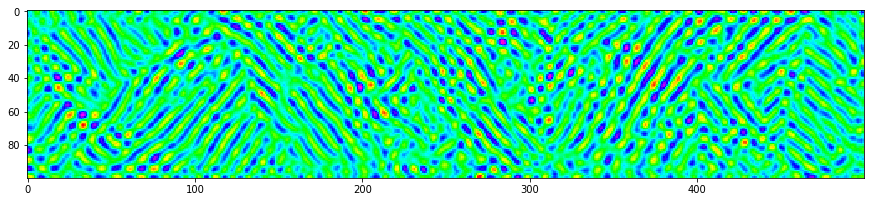

In [129]:
plotme("eta_00040")

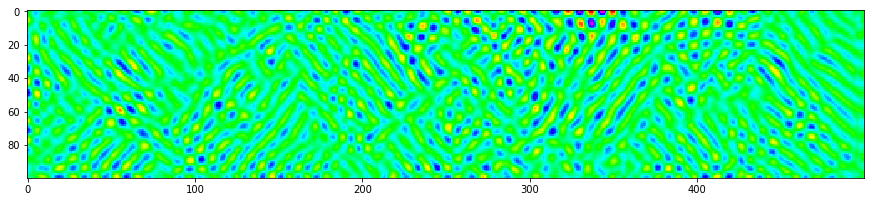

In [130]:
plotme("eta_00050")

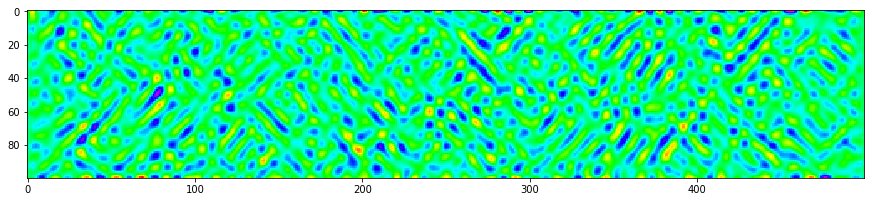

In [131]:
plotme("u_00040")

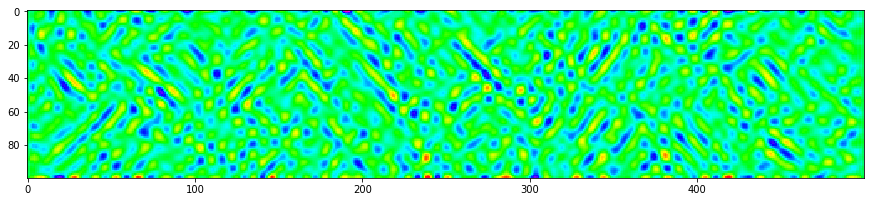

In [132]:
plotme("u_00050")

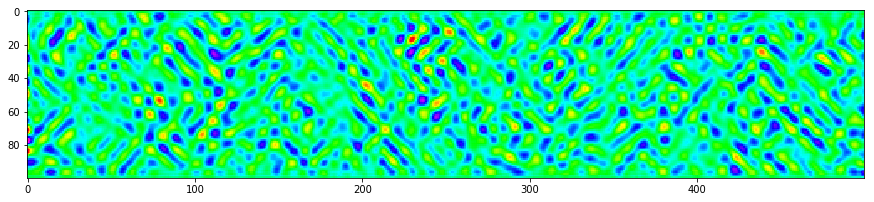

In [133]:
plotme("v_00050")